In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
#plt.style.use('seaborn')

In [59]:
sns.set_style("ticks")

## Preparing the dataframes

In [2]:
df_all = pd.read_csv('data/dataport-export_gas_oct2015-mar2016.csv')
len(df_all)

1584823

In [3]:
df_all = df_all.set_index(pd.to_datetime(df_all['localminute']))

In [4]:
display(df_all.head(), df_all.tail())

,localminute,dataid,meter_value
localminute,,,
2015-10-01 05:00:10,2015-10-01 00:00:10-05,739,88858
2015-10-01 05:00:13,2015-10-01 00:00:13-05,8890,197164
2015-10-01 05:00:20,2015-10-01 00:00:20-05,6910,179118
2015-10-01 05:00:22,2015-10-01 00:00:22-05,3635,151318
2015-10-01 05:00:22,2015-10-01 00:00:22-05,1507,390354


,localminute,dataid,meter_value
localminute,,,
2016-04-01 04:59:14.336743,2016-03-31 23:59:14.336743-05,2129,201726
2016-04-01 04:59:17.427165,2016-03-31 23:59:17.427165-05,2945,161232
2016-04-01 04:59:35.370782,2016-03-31 23:59:35.370782-05,9729,138146
2016-04-01 04:59:47.816286,2016-03-31 23:59:47.816286-05,5129,166488
2016-04-01 04:59:58.923080,2016-03-31 23:59:58.92308-05,484,114174


In [5]:
df_all = df_all.drop(columns='localminute')
display(df_all.head())

,dataid,meter_value
localminute,,
2015-10-01 05:00:10,739,88858
2015-10-01 05:00:13,8890,197164
2015-10-01 05:00:20,6910,179118
2015-10-01 05:00:22,3635,151318
2015-10-01 05:00:22,1507,390354


In [6]:
groups = df_all.groupby('dataid')
keys = groups.groups.keys()  # keys: an iterable of dataids or meter ids

# check if each group (grouped by meter id) is sorted in ascending order by datetime.
for key in keys:
    df_i = groups.get_group(key)
    print(df_i.index.is_monotonic_increasing)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


### Check meterids

In [7]:
keys_list = list(keys)
print(keys_list)

[35, 44, 77, 94, 114, 187, 222, 252, 370, 483, 484, 661, 739, 744, 871, 1042, 1086, 1103, 1185, 1283, 1403, 1415, 1507, 1556, 1589, 1619, 1697, 1714, 1718, 1790, 1791, 1792, 1800, 1801, 2018, 2034, 2072, 2094, 2129, 2233, 2335, 2378, 2449, 2461, 2470, 2575, 2638, 2645, 2755, 2814, 2818, 2945, 2946, 2965, 2980, 3036, 3039, 3134, 3310, 3367, 3527, 3544, 3577, 3635, 3723, 3778, 3849, 3893, 3918, 4029, 4031, 4193, 4228, 4296, 4352, 4356, 4373, 4421, 4447, 4514, 4671, 4732, 4767, 4874, 4998, 5129, 5131, 5193, 5275, 5317, 5395, 5403, 5439, 5484, 5545, 5636, 5658, 5785, 5810, 5814, 5892, 5972, 6101, 6412, 6505, 6578, 6673, 6685, 6830, 6836, 6863, 6910, 7016, 7017, 7030, 7117, 7287, 7429, 7460, 7566, 7674, 7682, 7739, 7741, 7794, 7900, 7919, 7965, 7989, 8059, 8084, 8086, 8155, 8156, 8244, 8386, 8467, 8703, 8829, 8890, 8967, 9052, 9121, 9134, 9160, 9278, 9295, 9474, 9600, 9620, 9631, 9639, 9729, 9766, 9849, 9956, 9982]


### Print full-length (6 mth) plot by meterid.

C:\Users\Melvin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


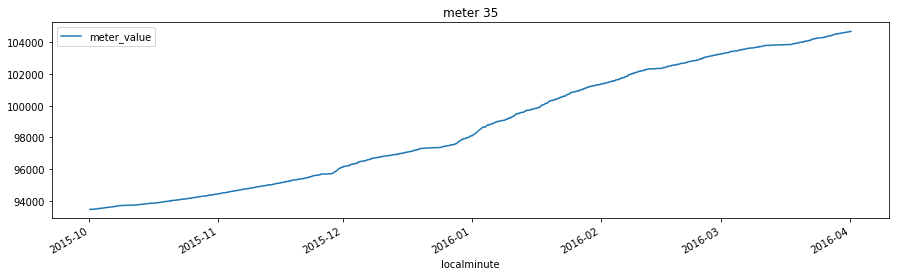

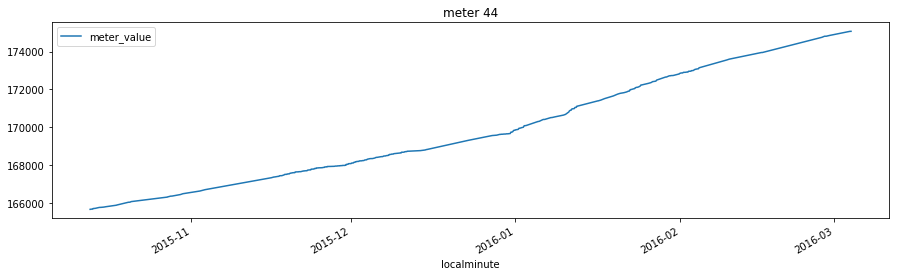

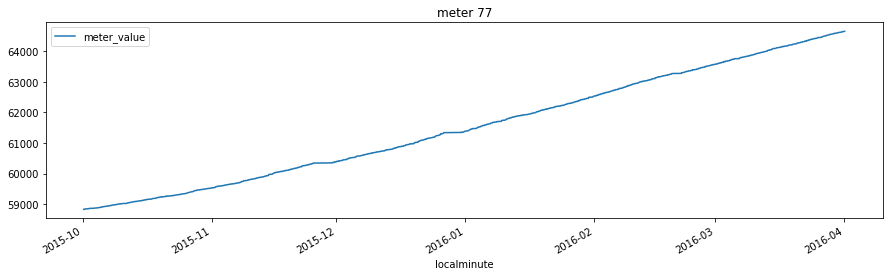

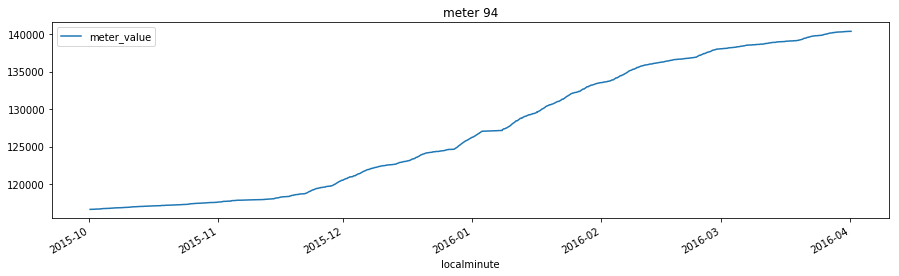

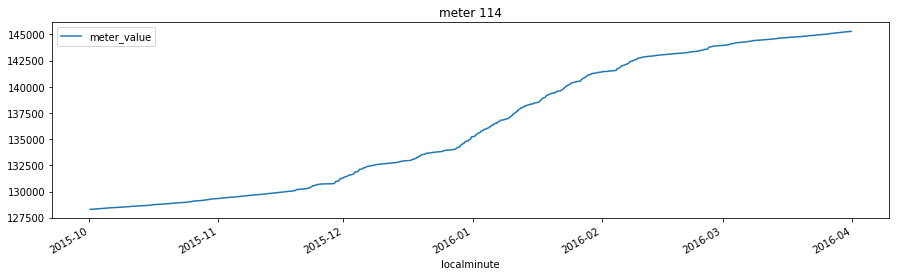

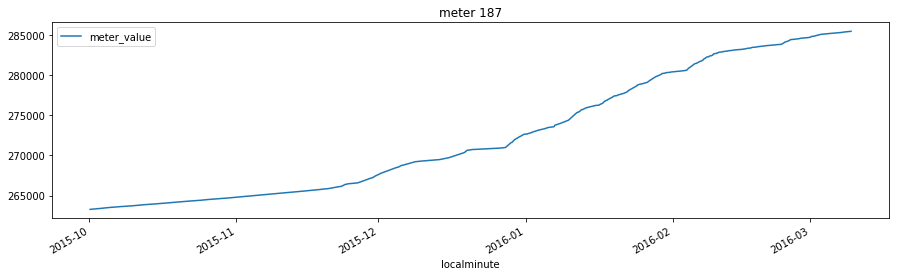

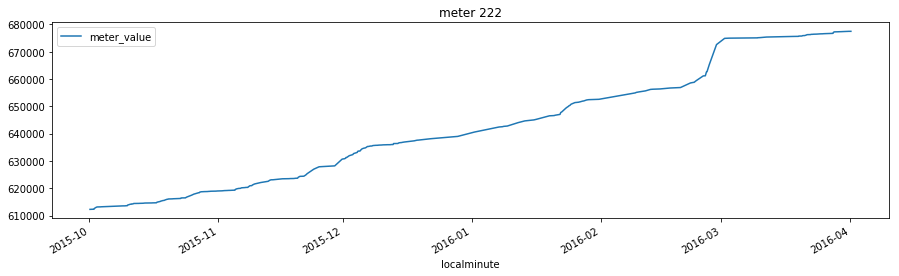

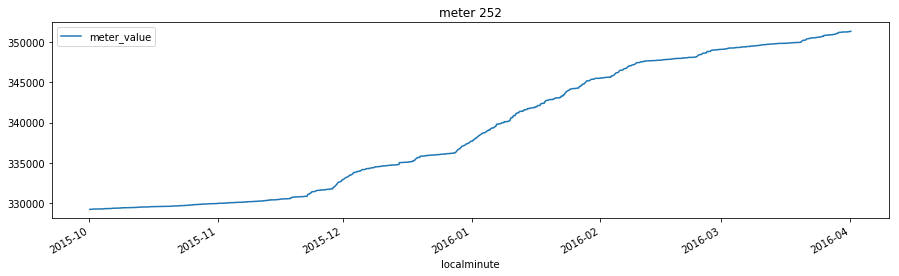

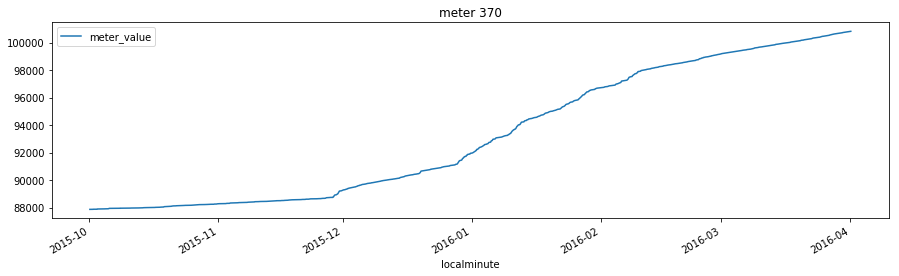

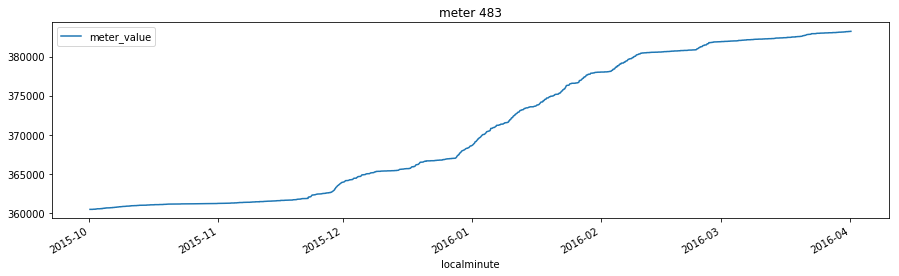

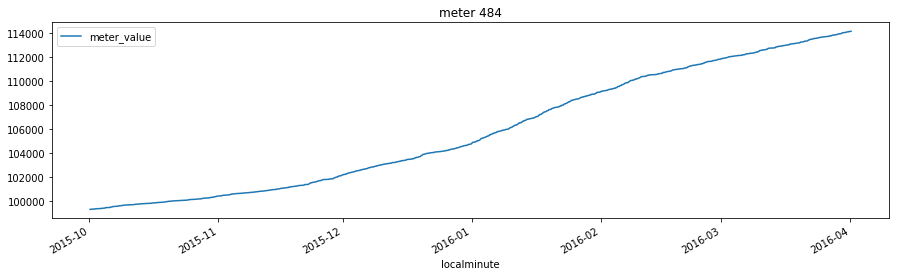

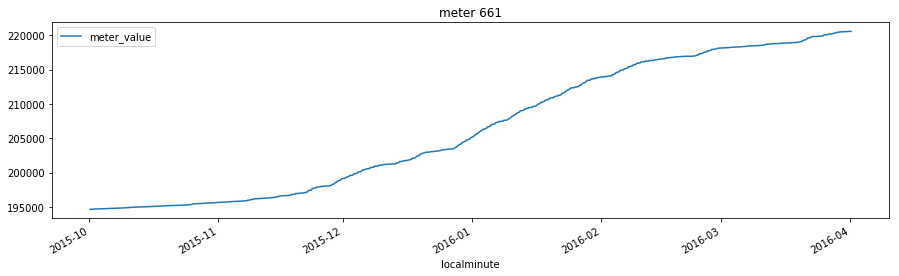

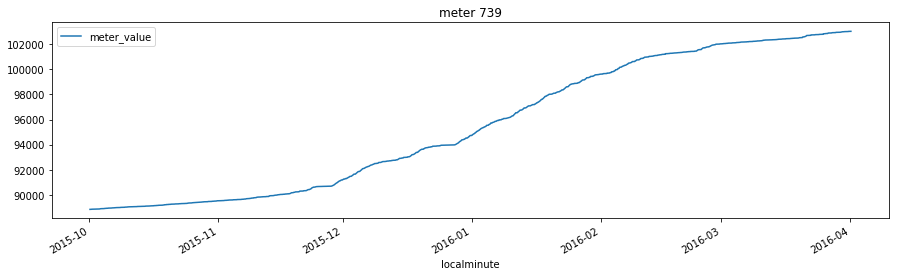

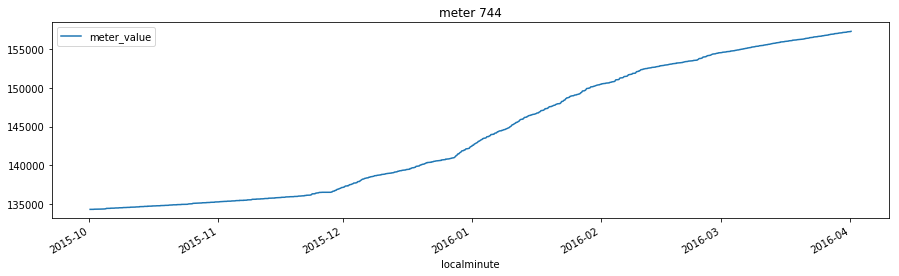

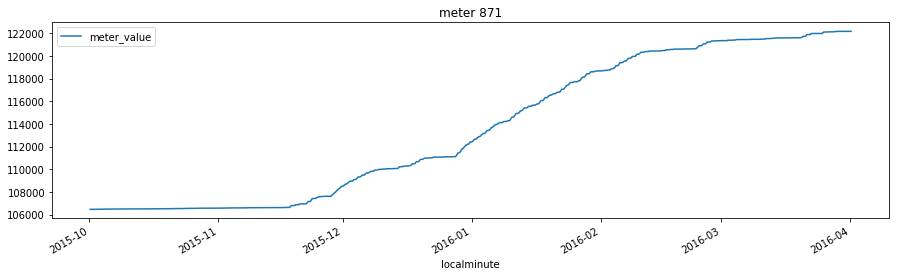

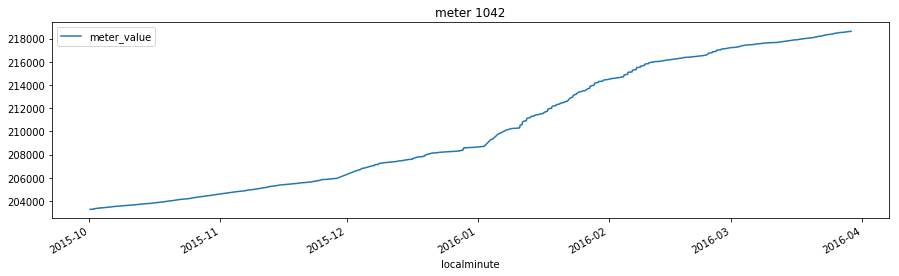

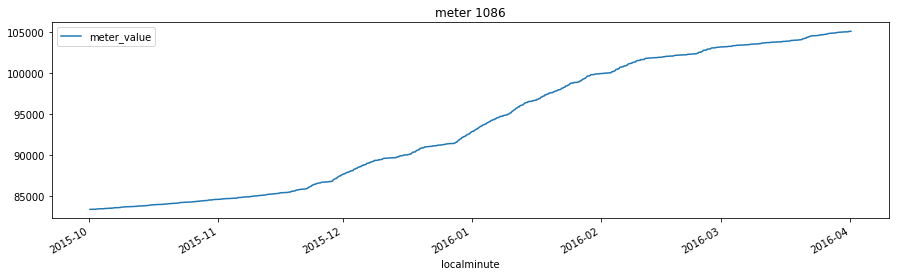

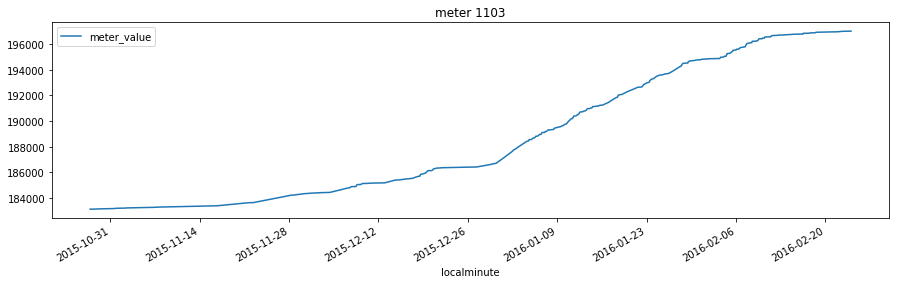

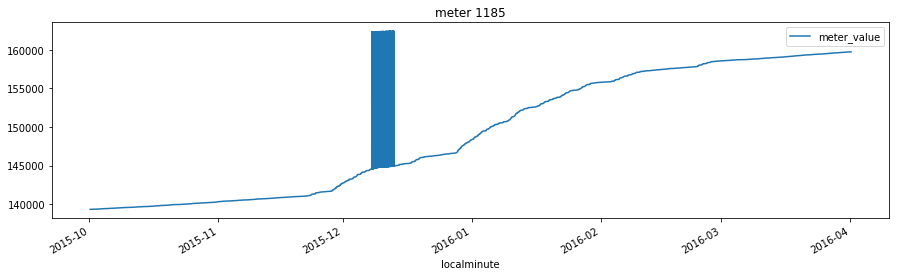

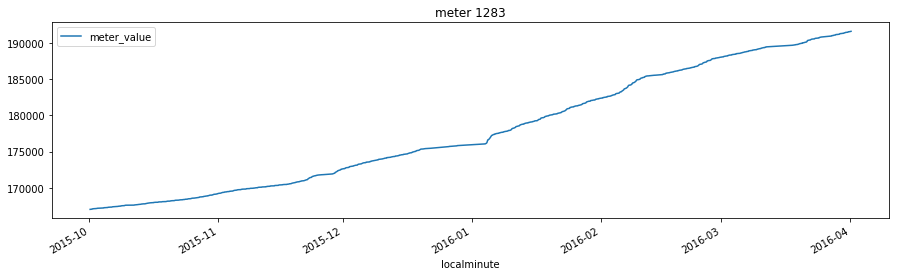

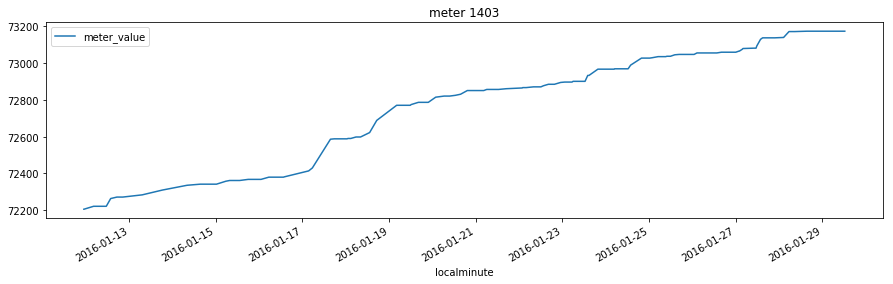

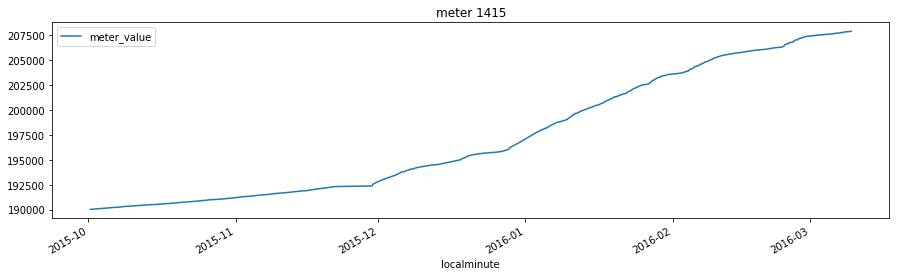

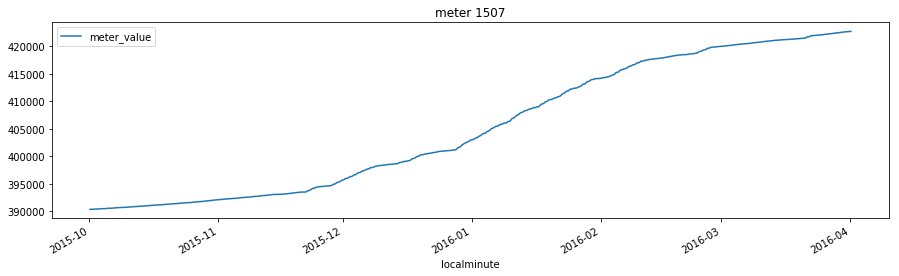

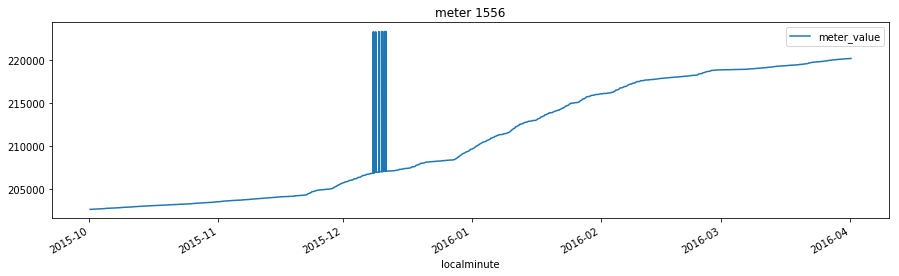

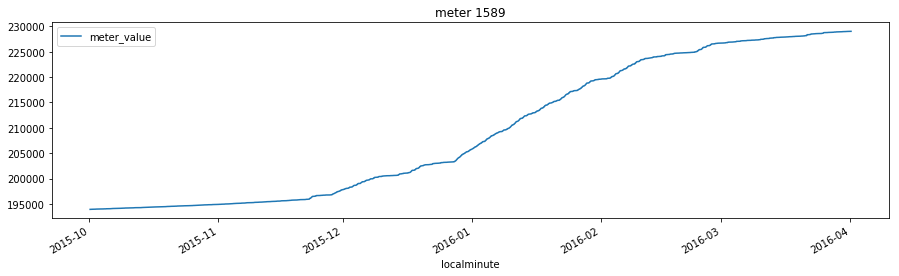

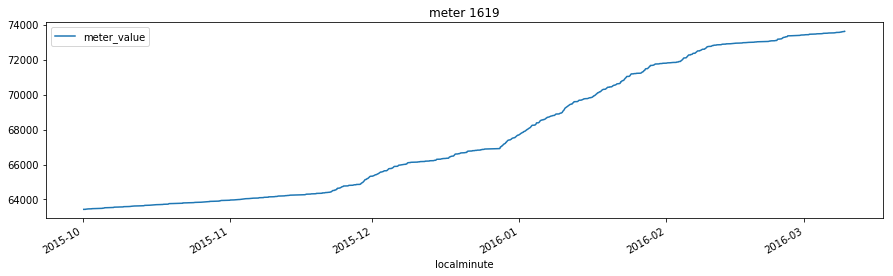

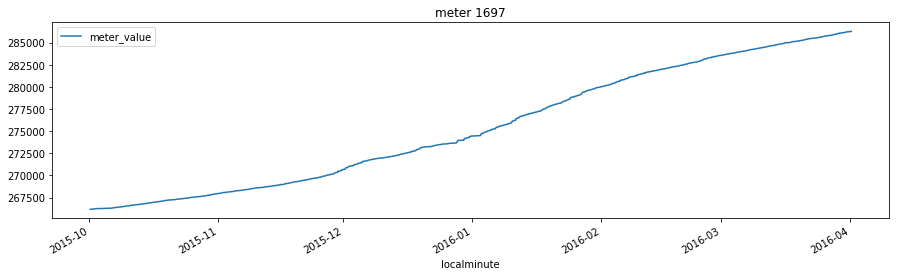

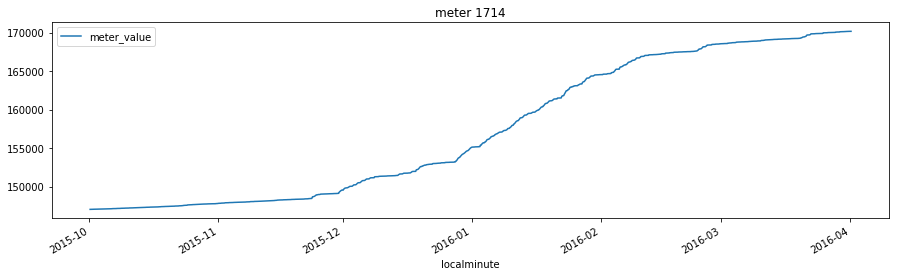

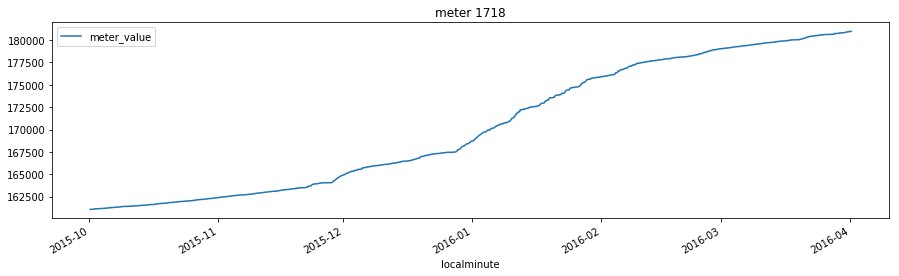

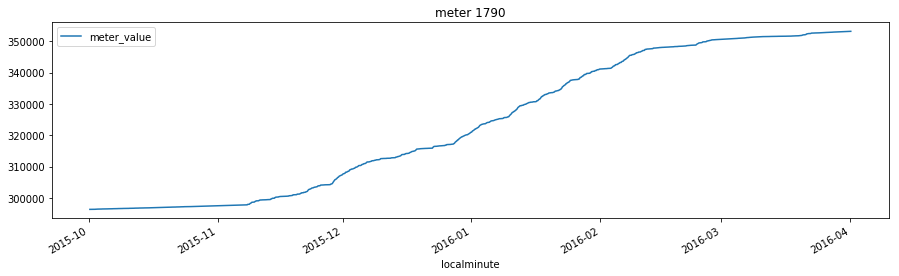

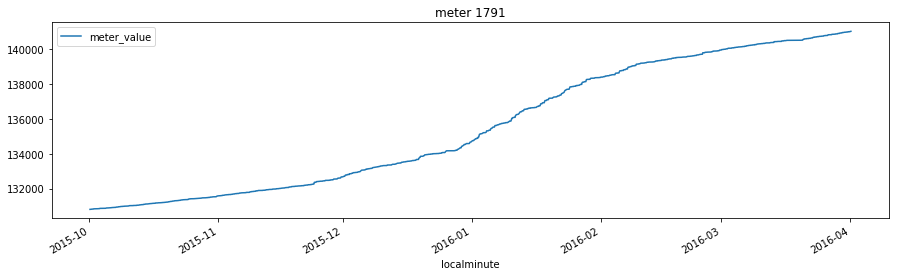

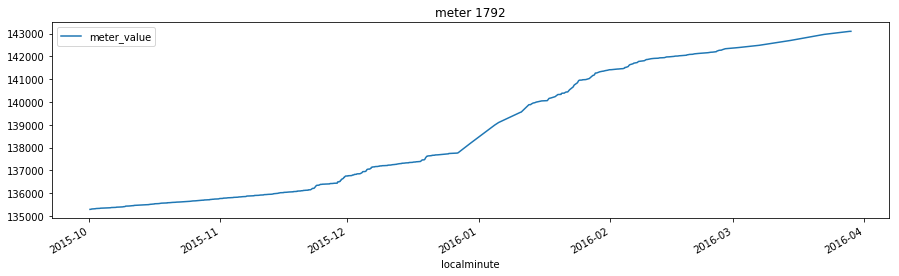

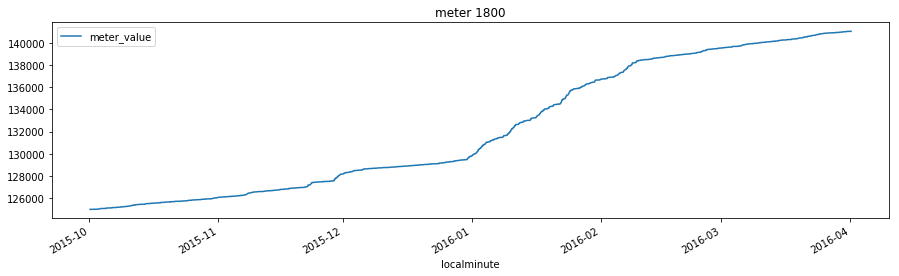

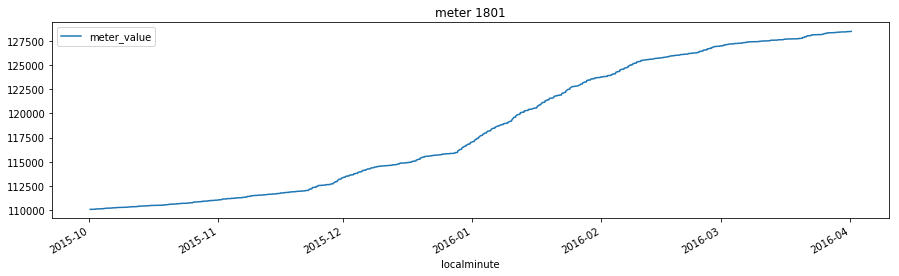

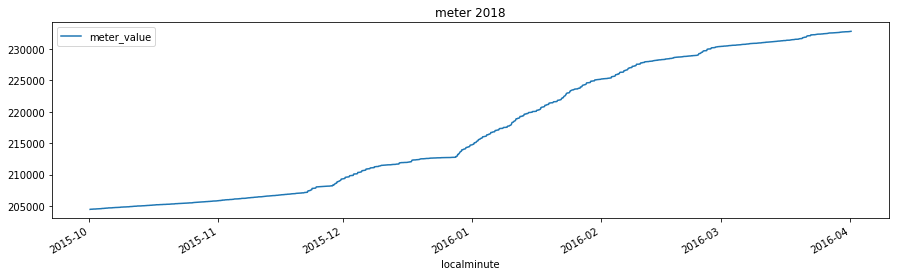

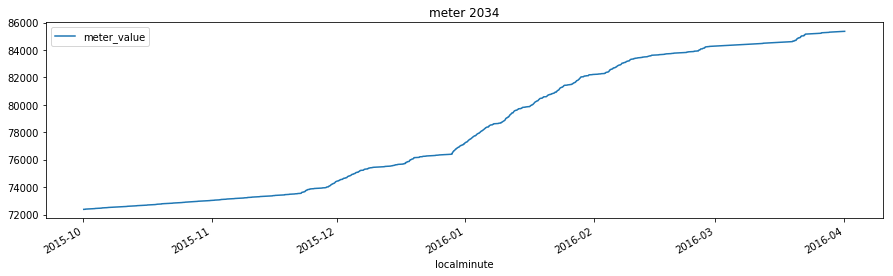

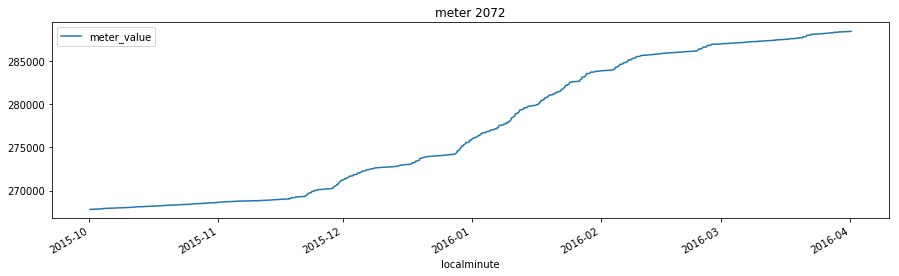

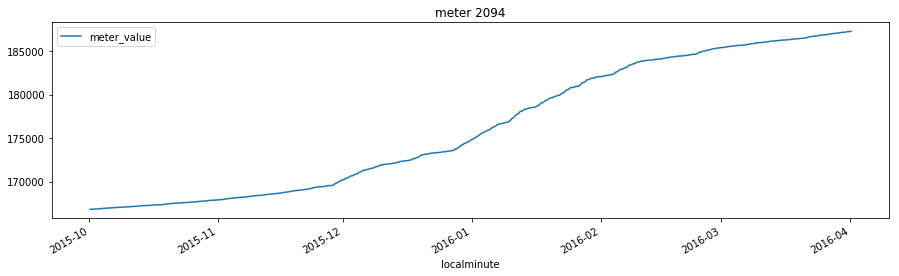

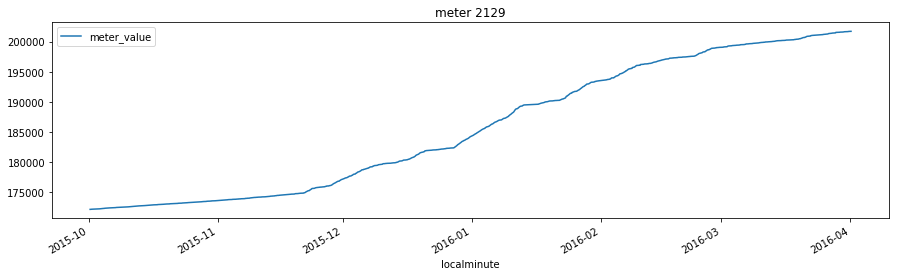

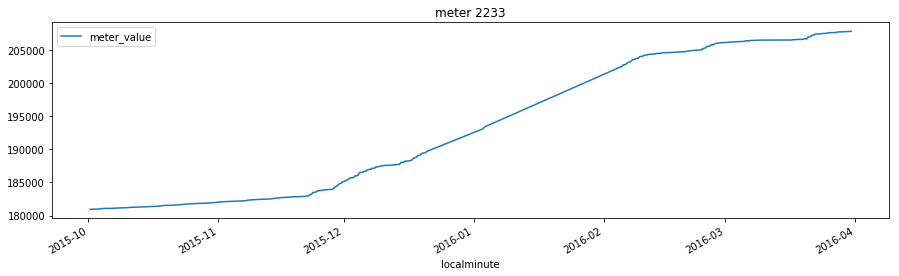

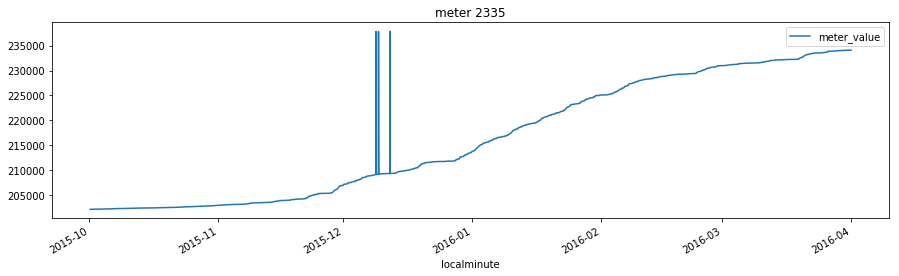

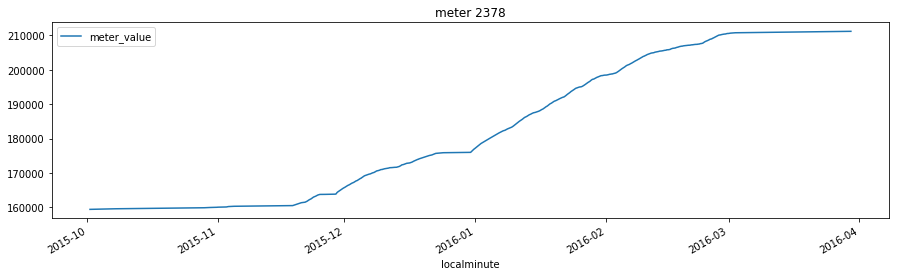

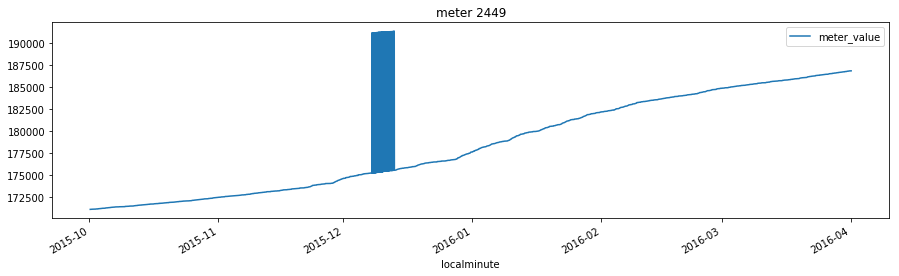

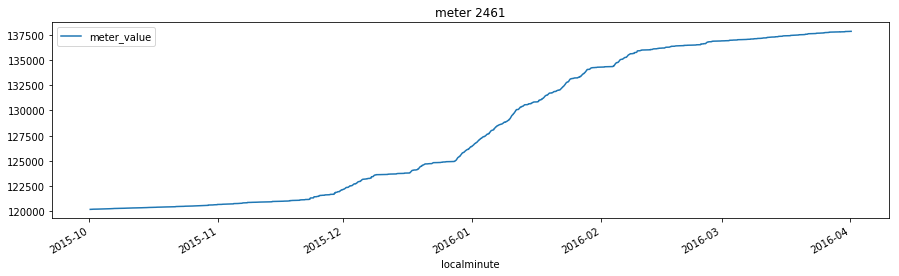

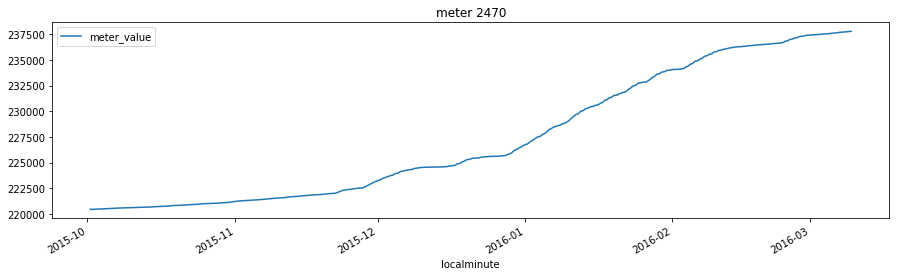

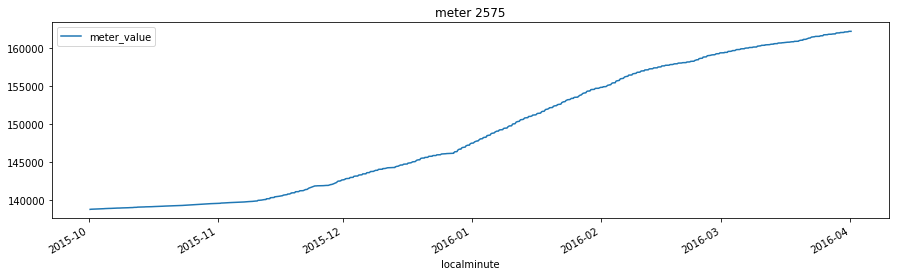

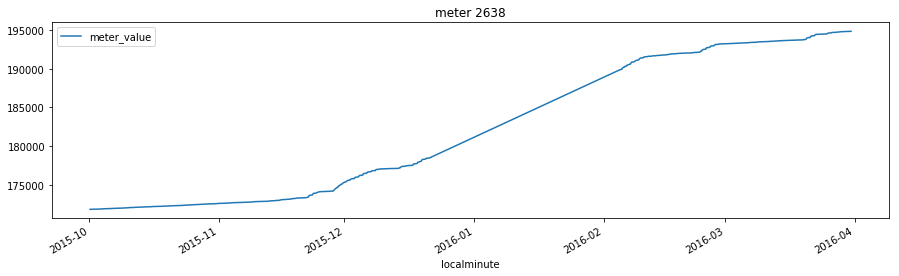

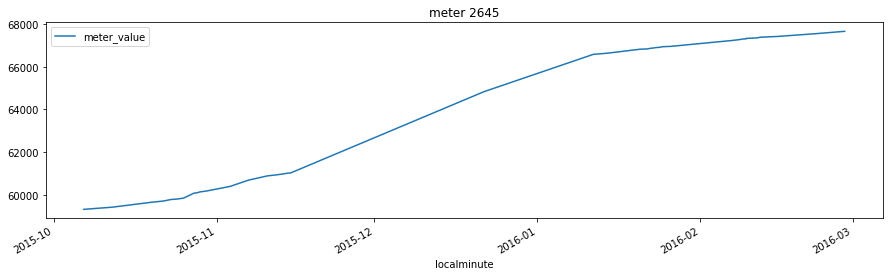

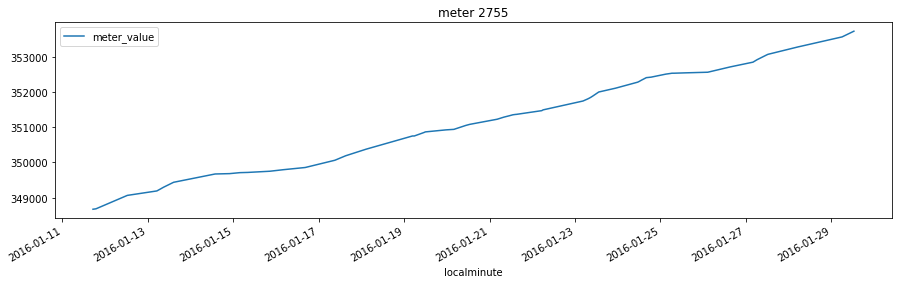

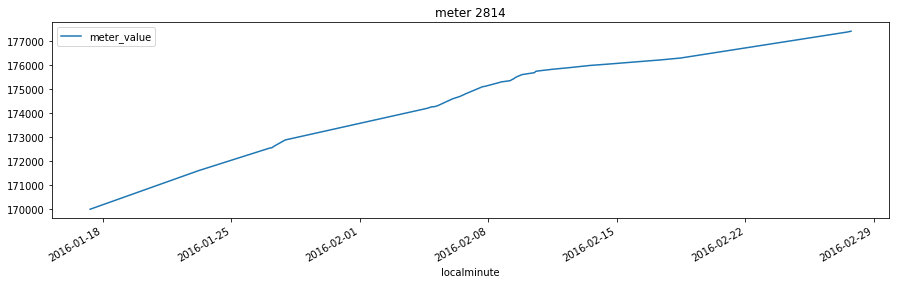

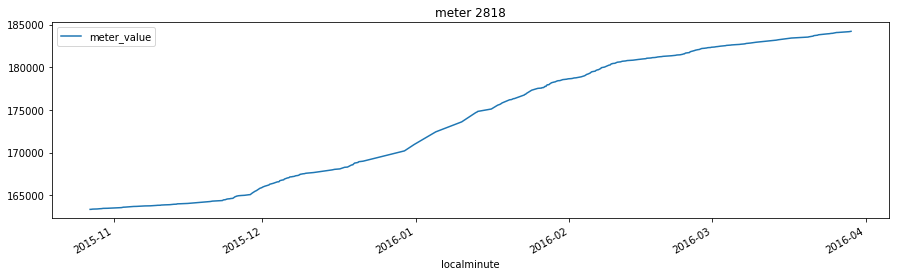

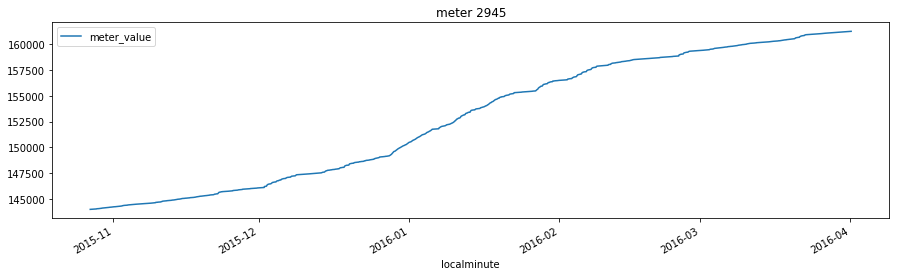

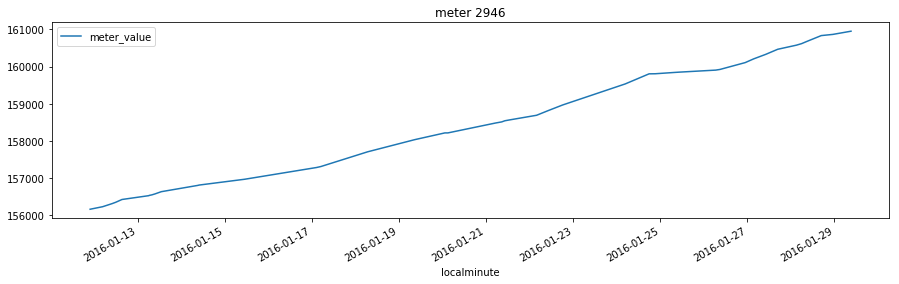

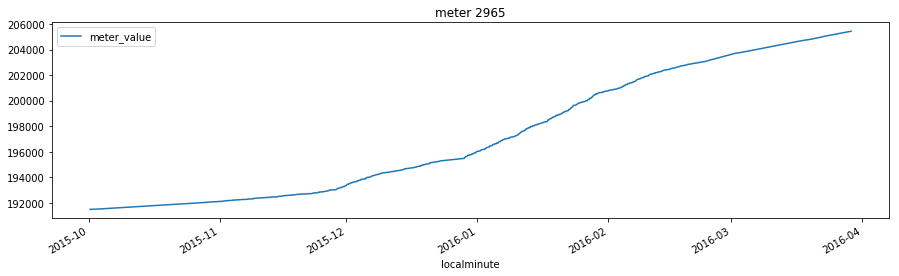

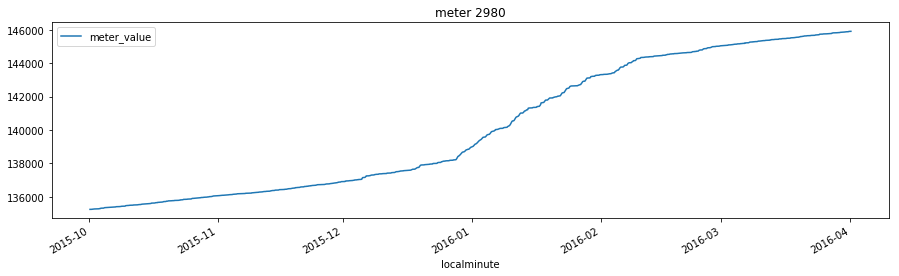

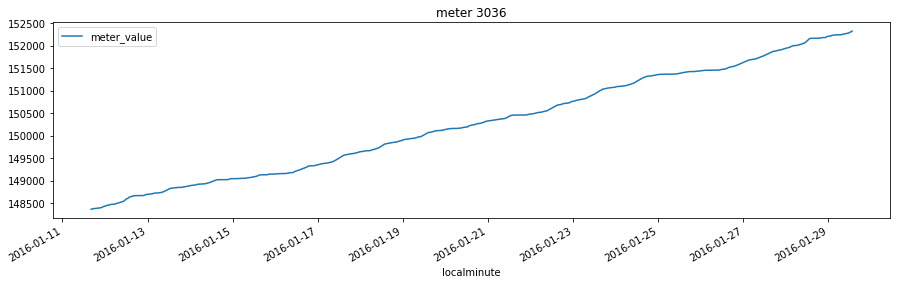

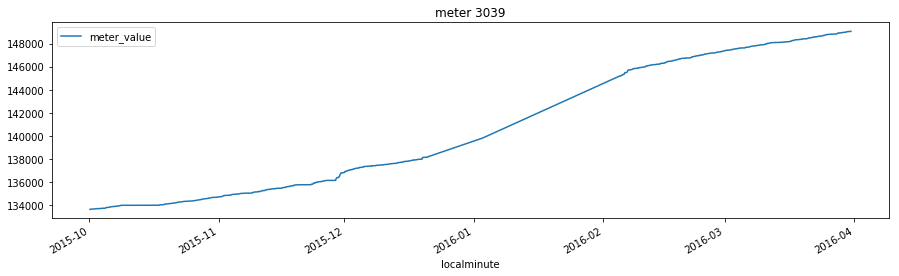

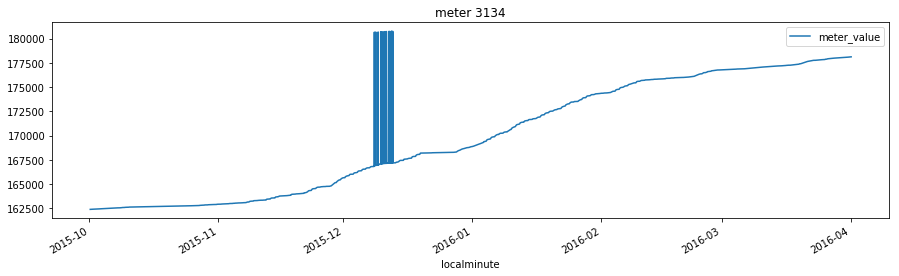

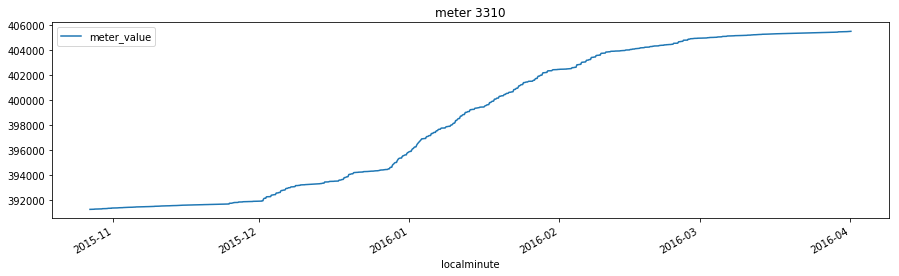

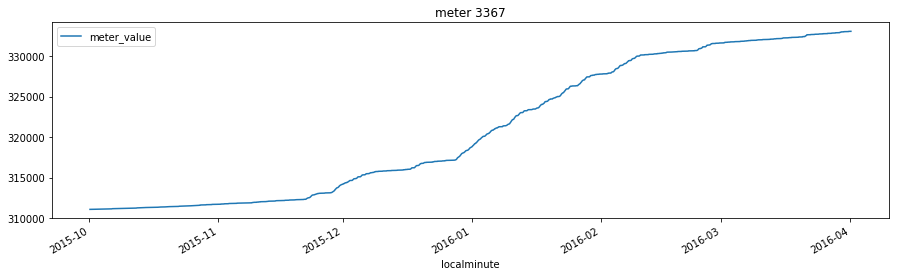

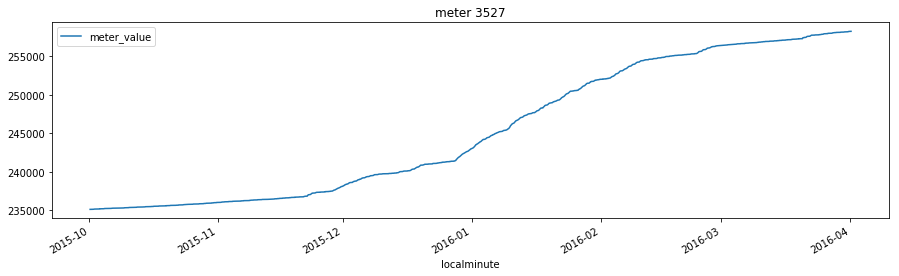

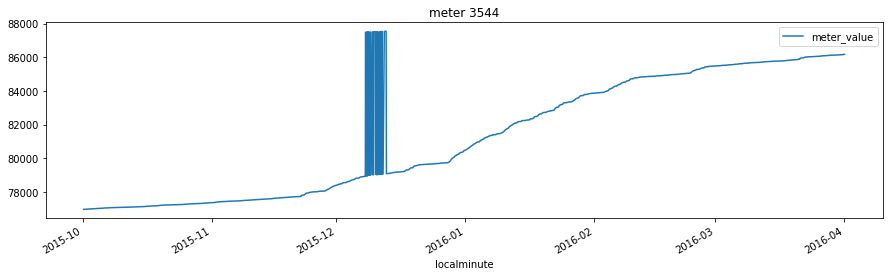

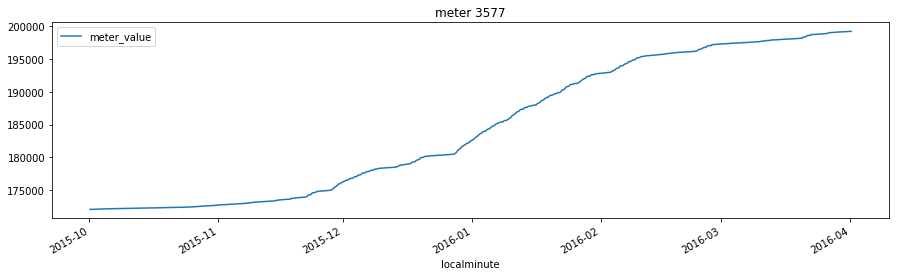

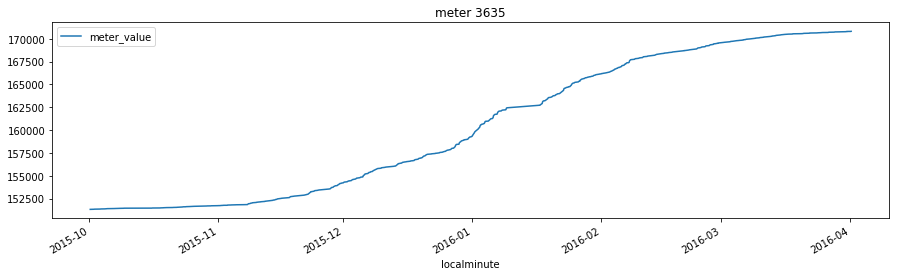

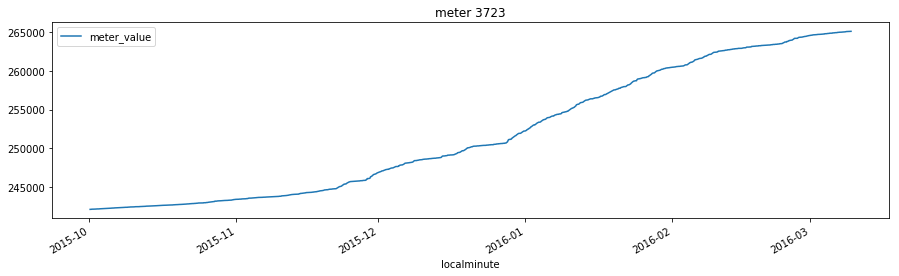

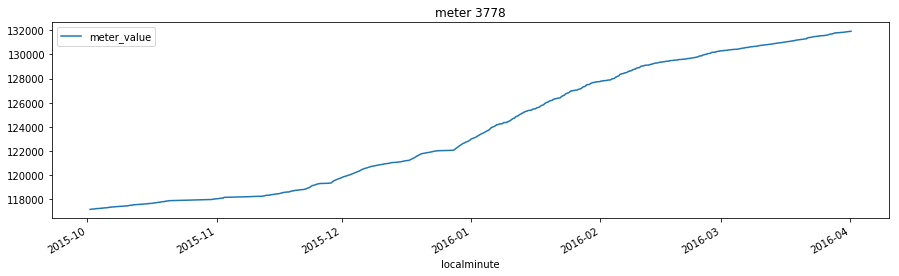

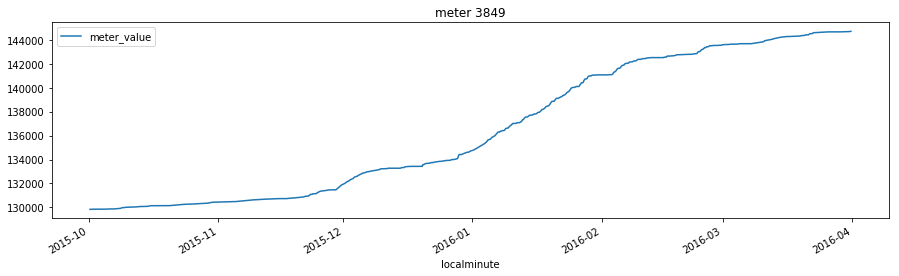

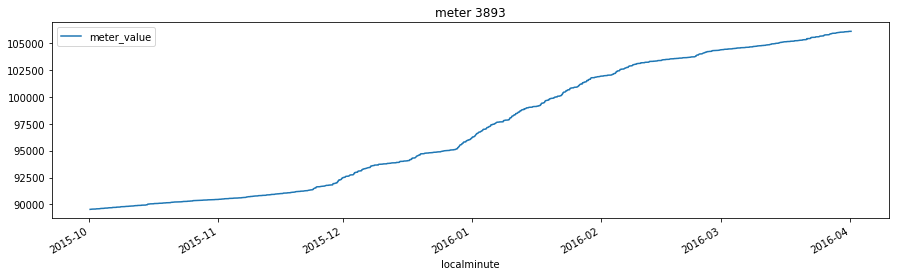

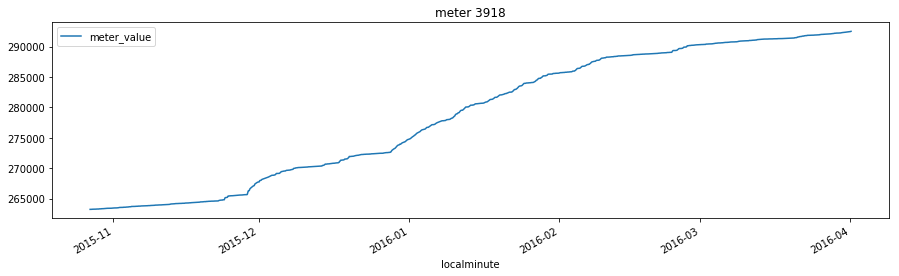

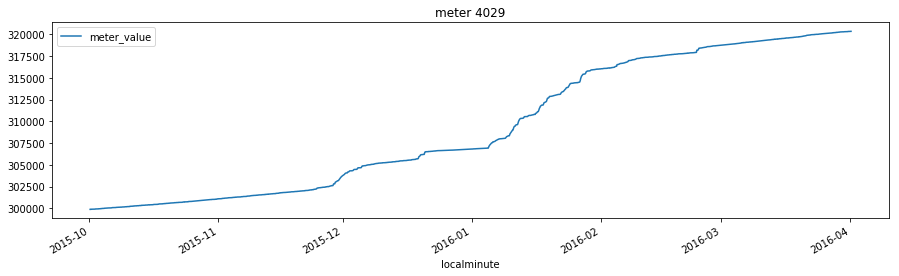

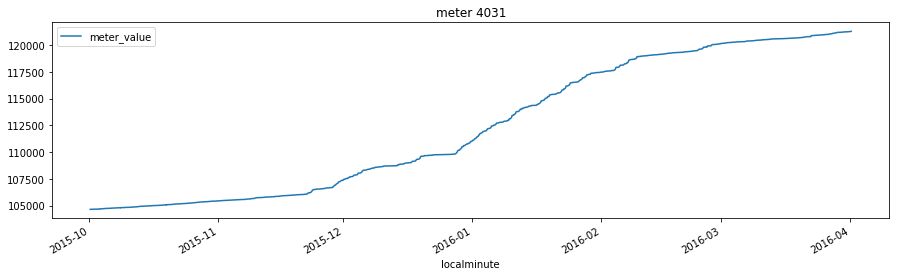

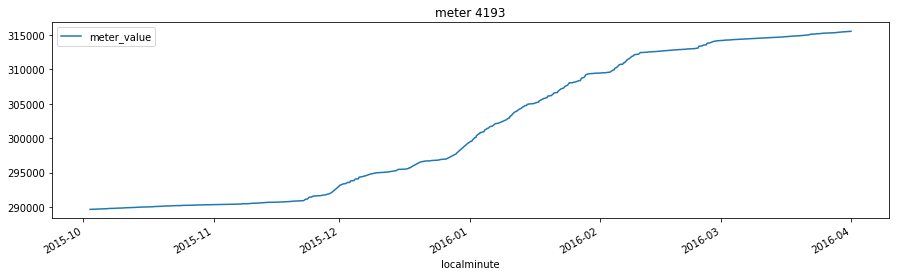

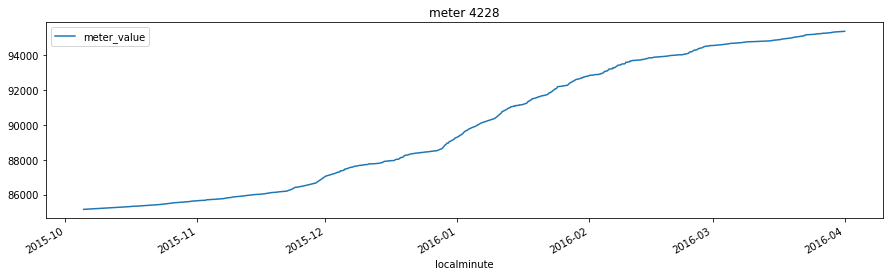

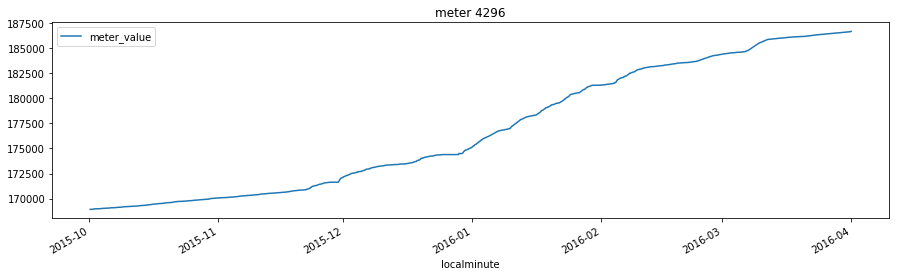

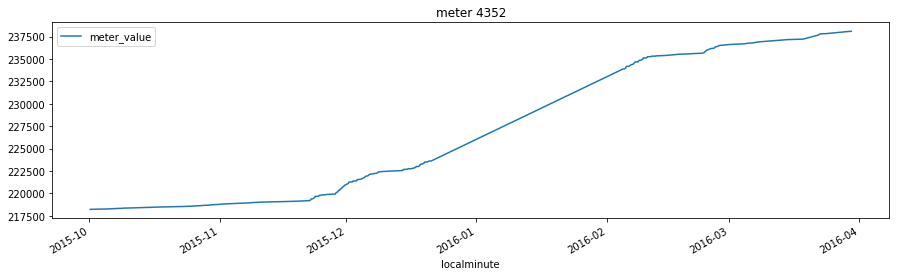

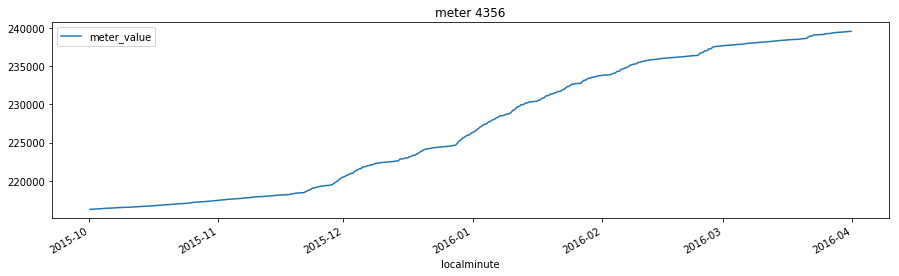

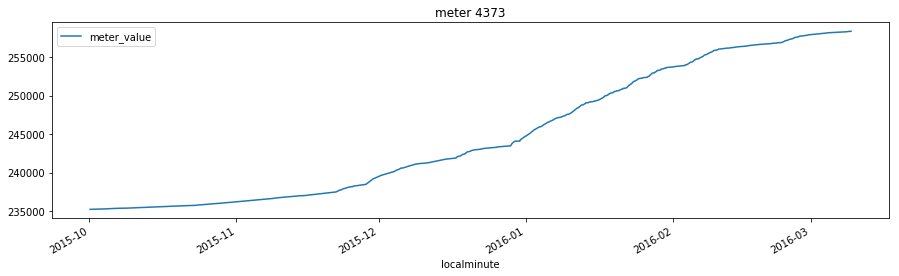

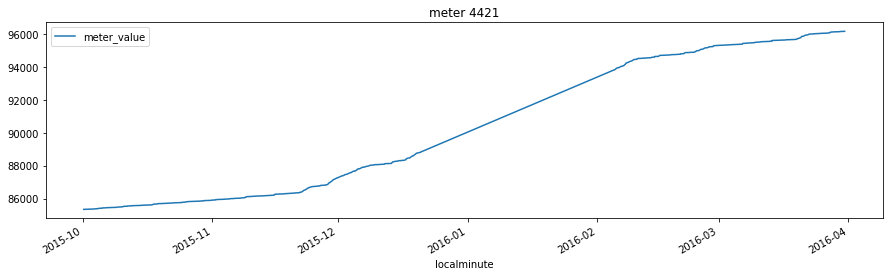

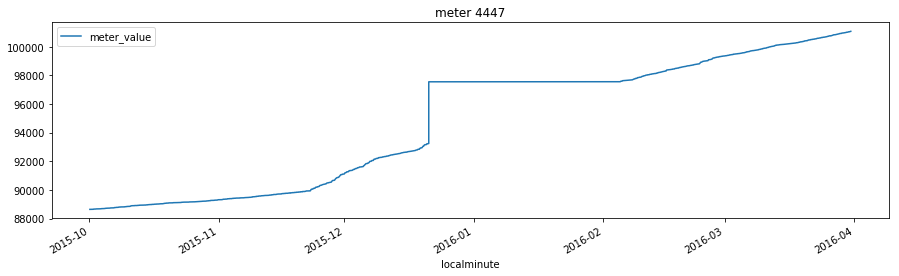

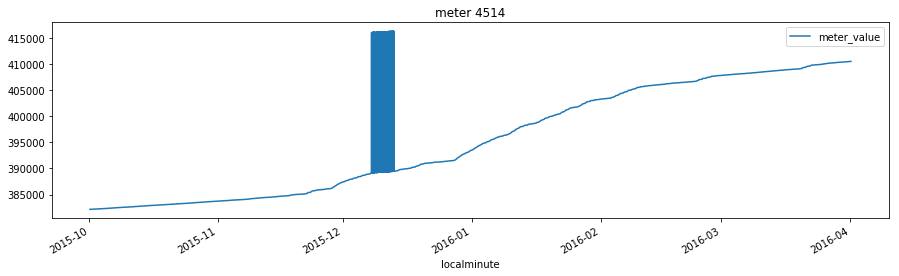

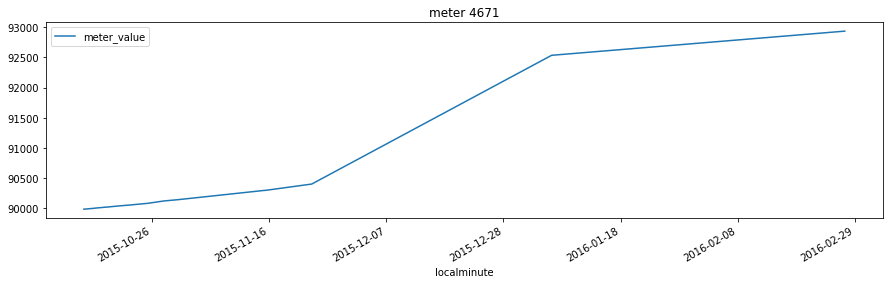

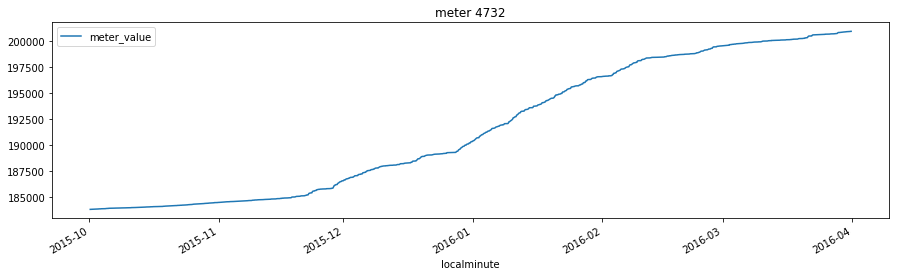

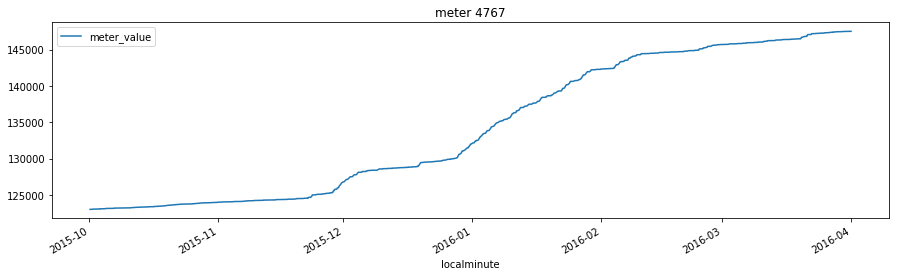

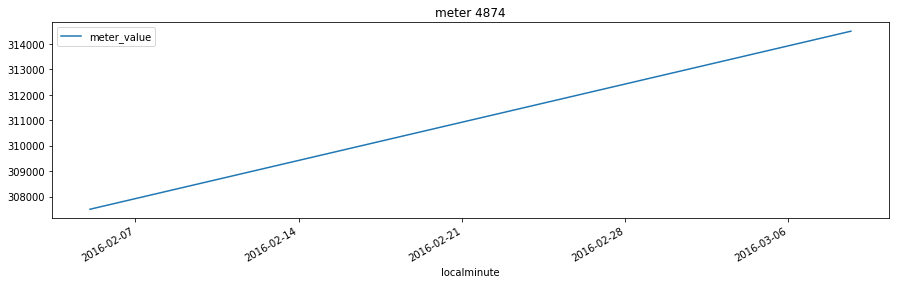

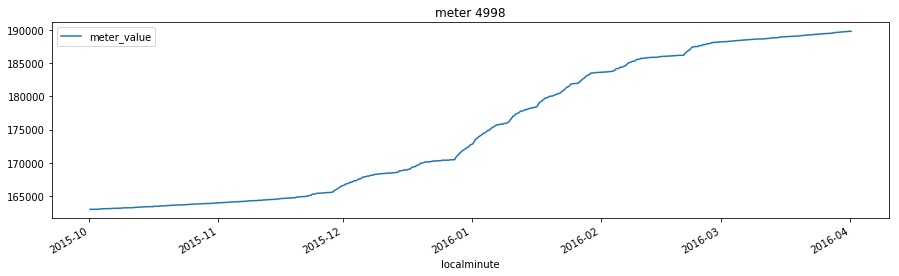

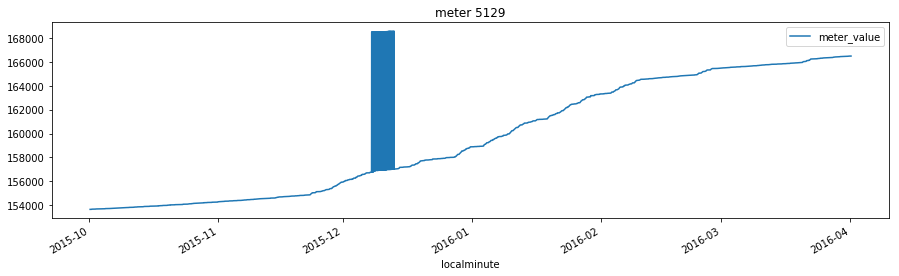

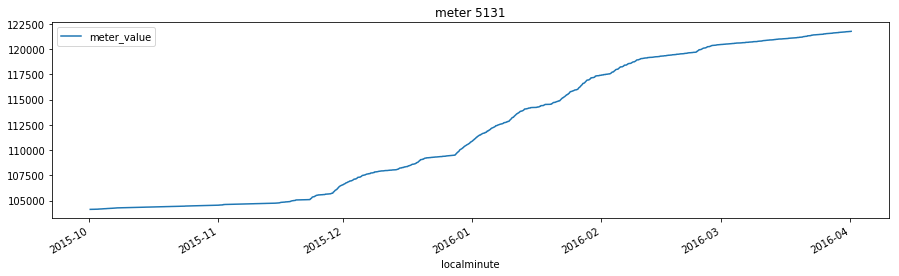

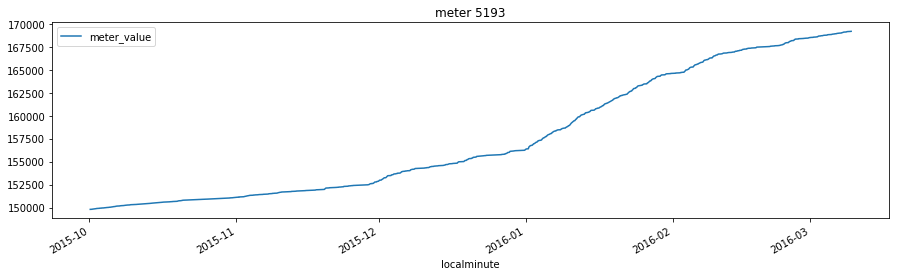

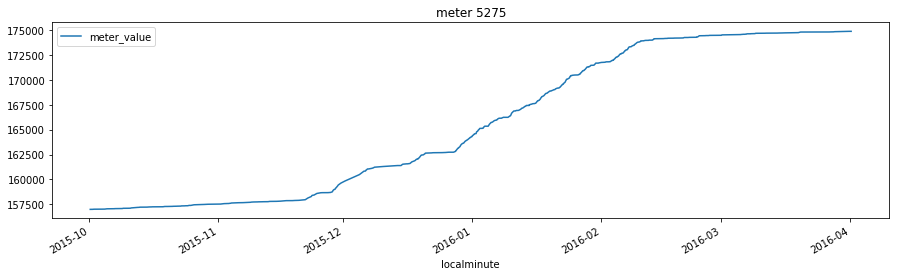

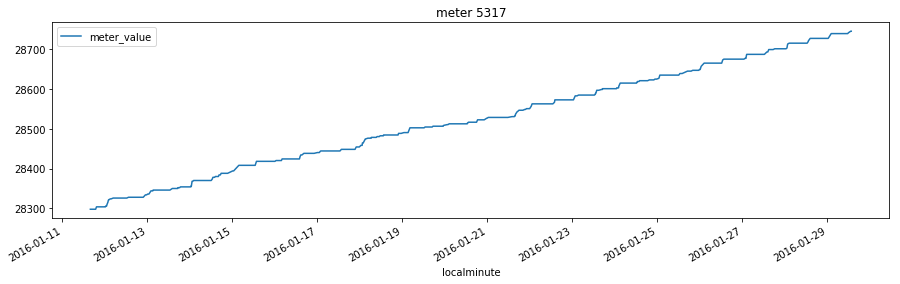

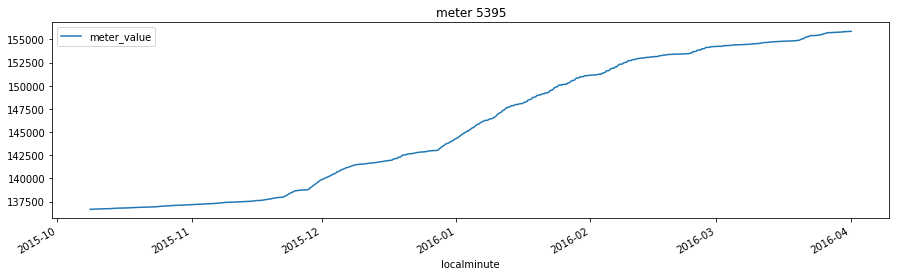

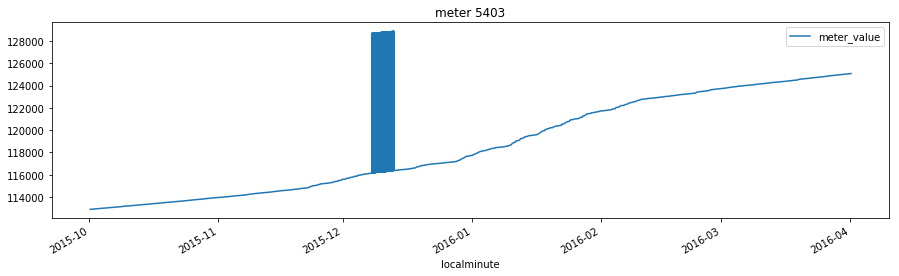

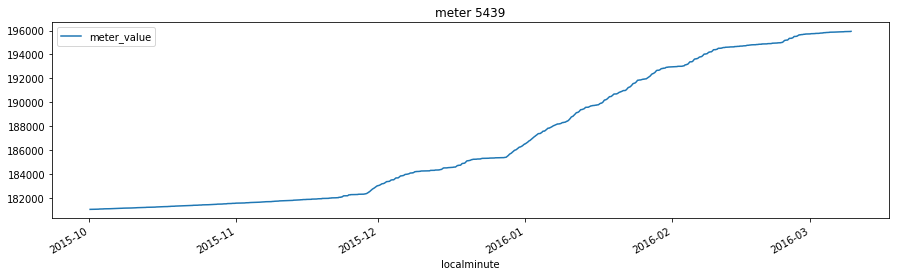

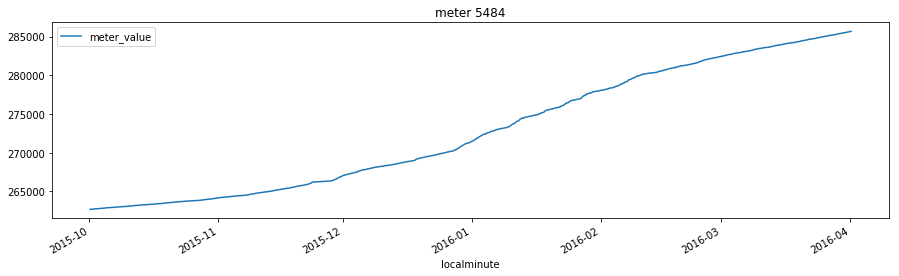

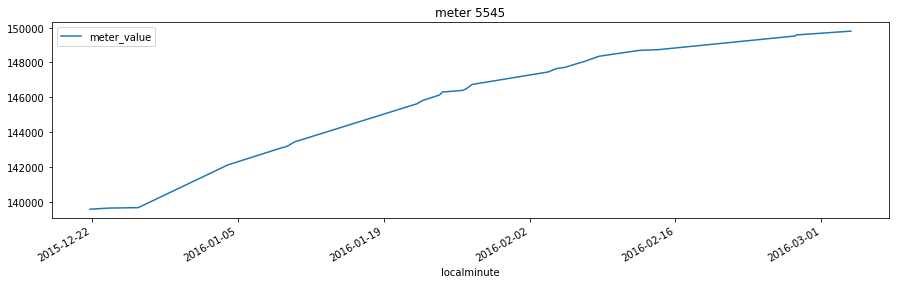

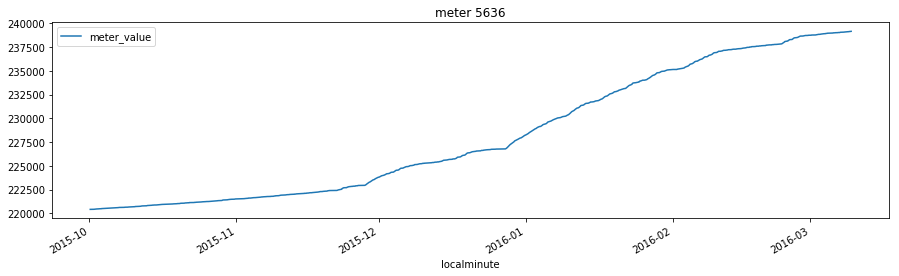

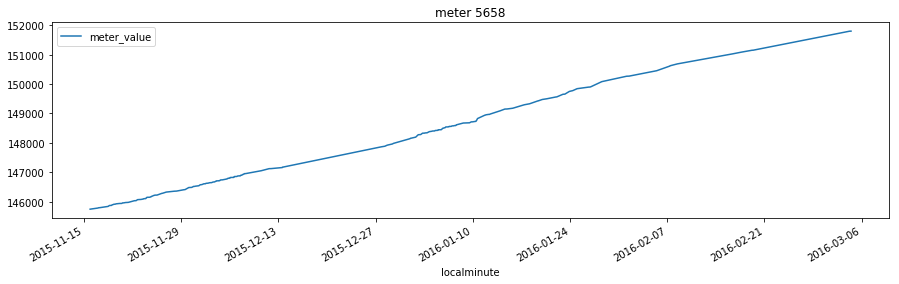

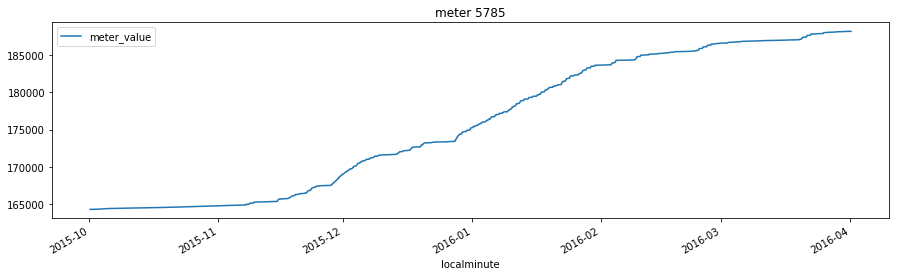

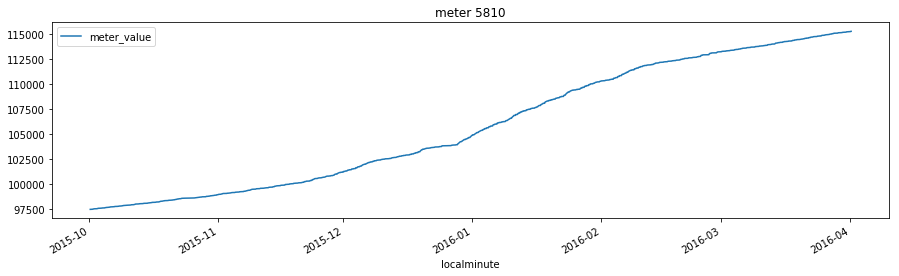

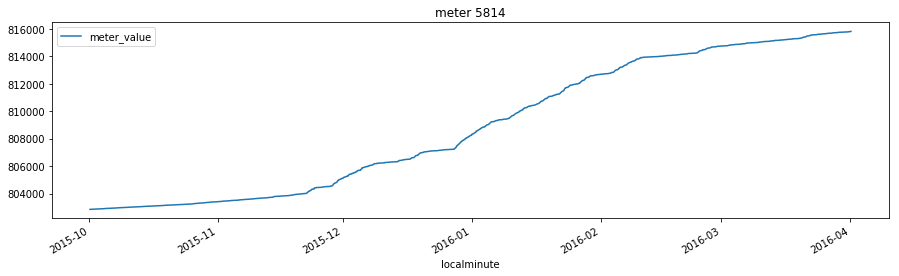

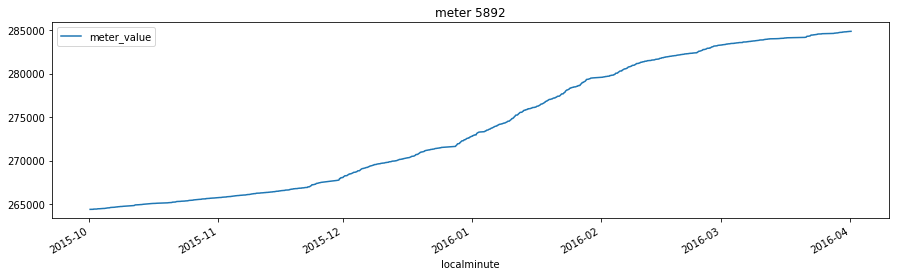

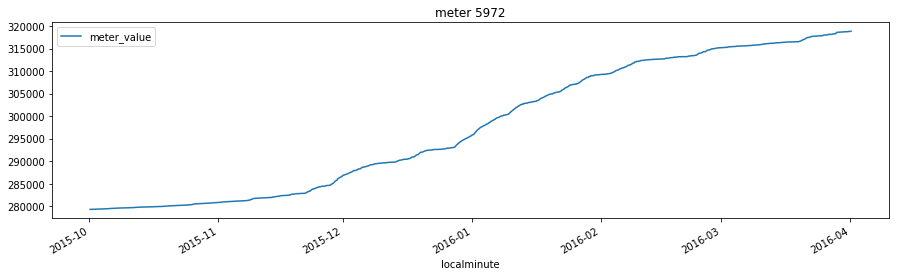

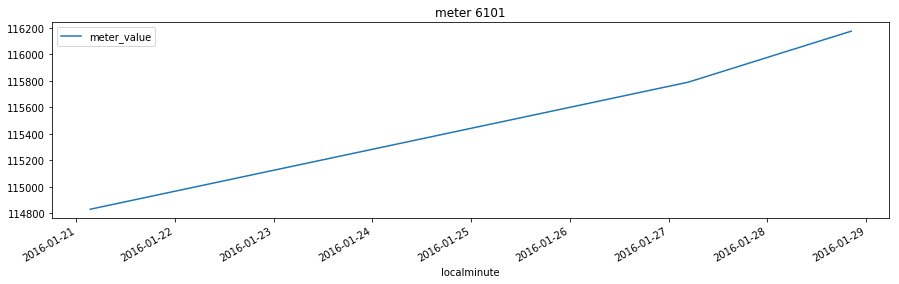

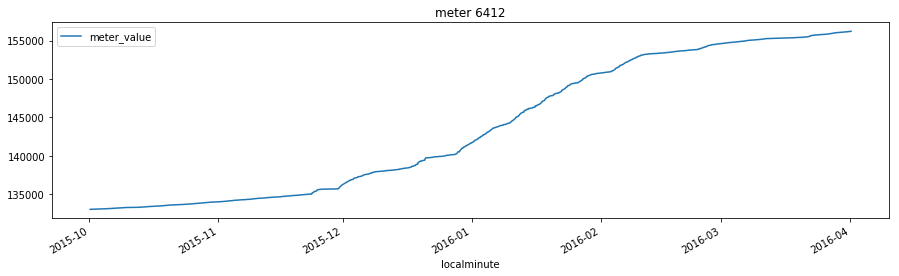

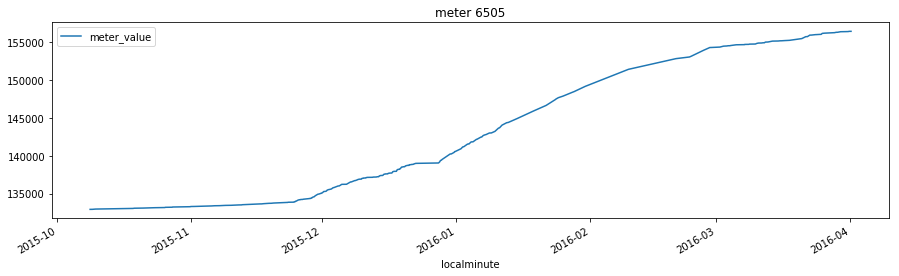

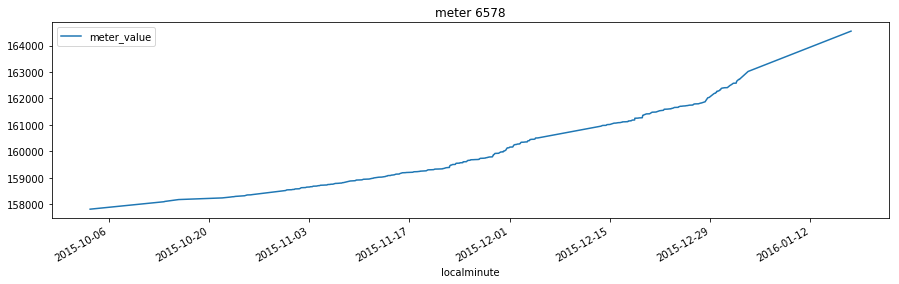

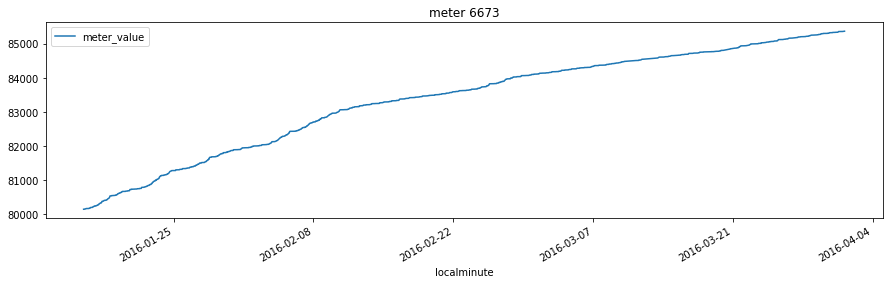

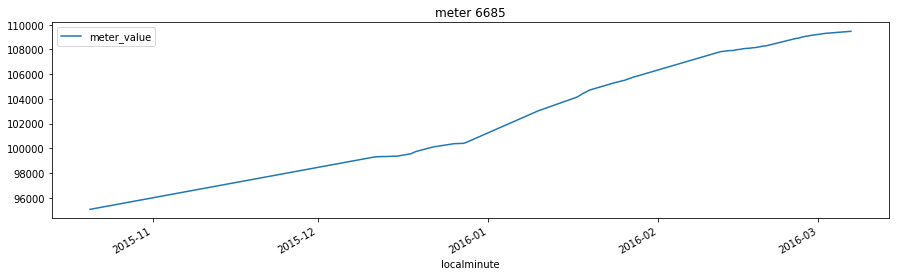

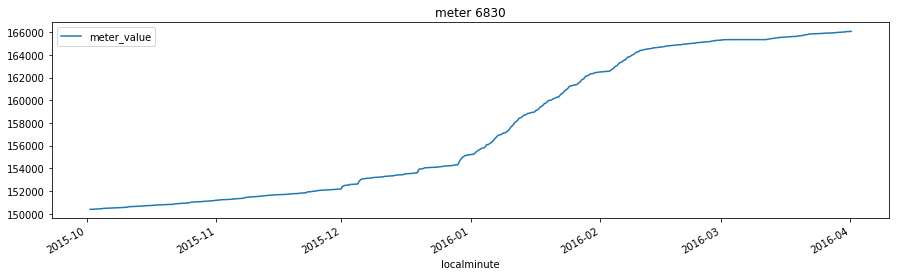

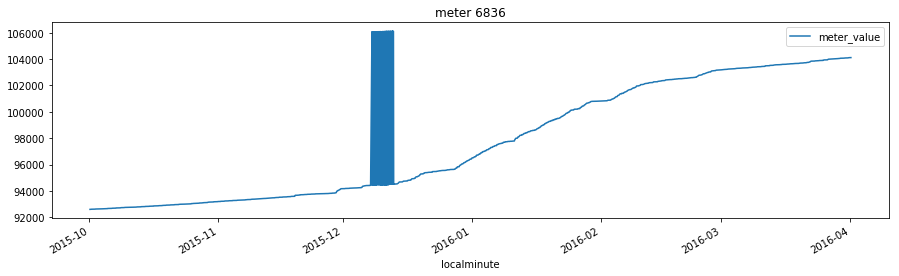

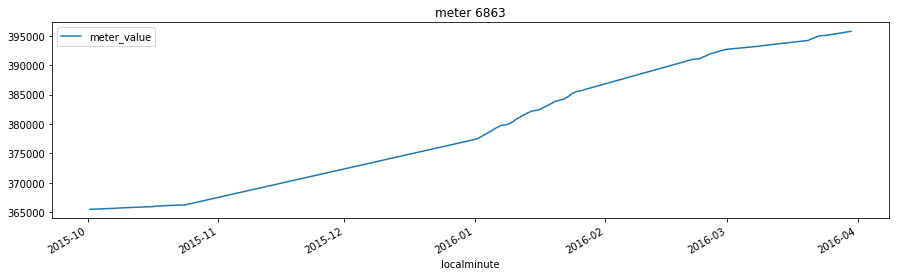

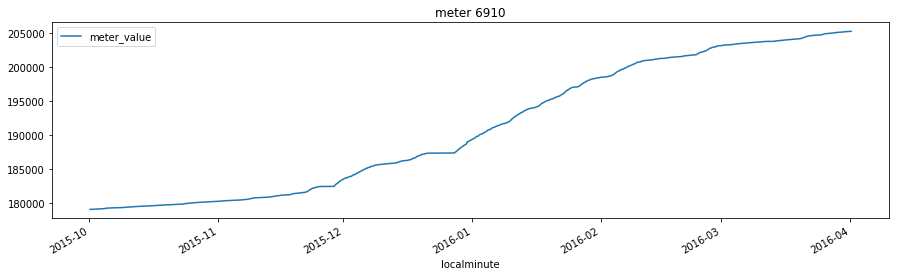

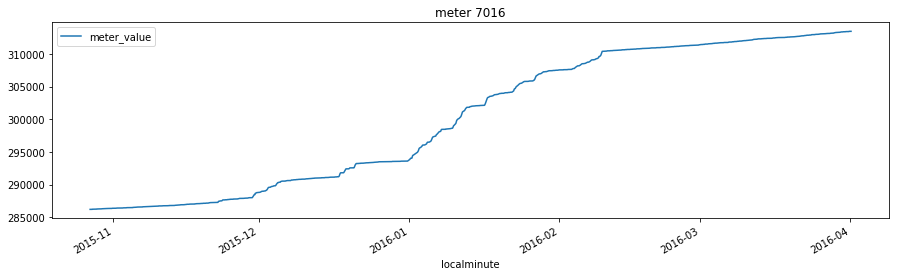

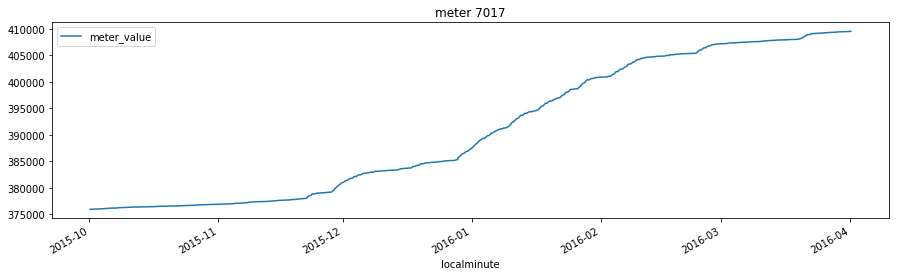

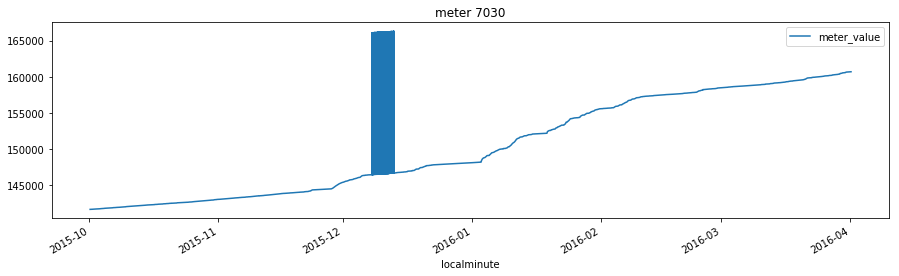

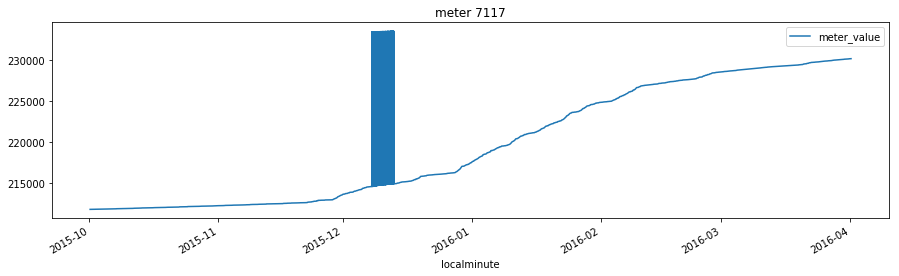

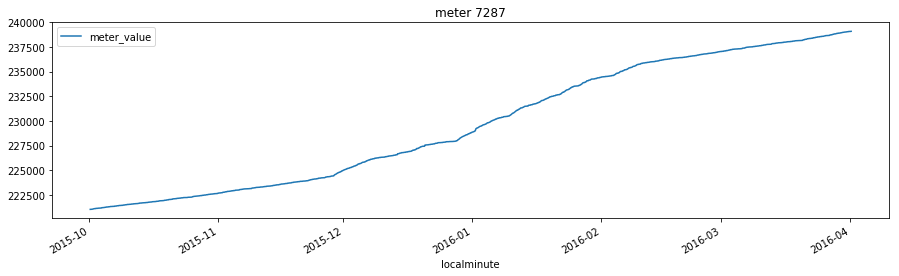

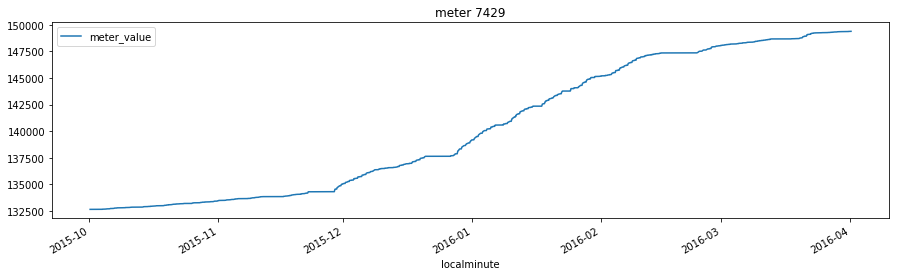

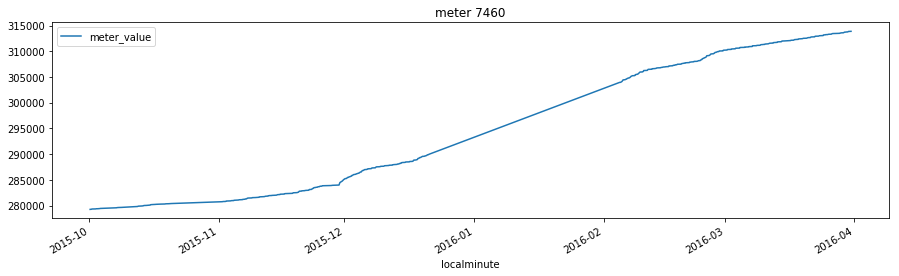

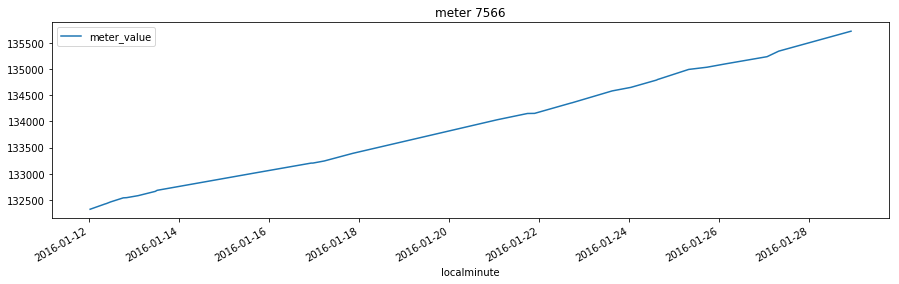

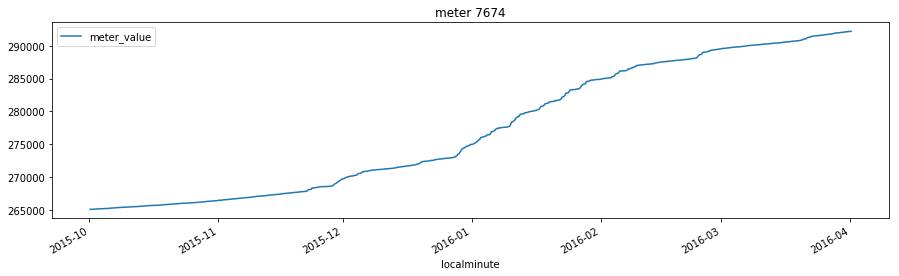

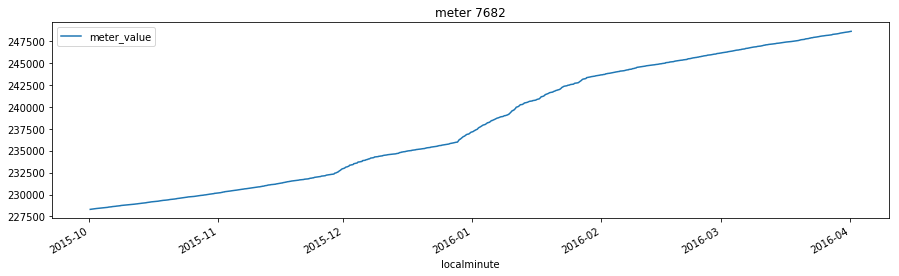

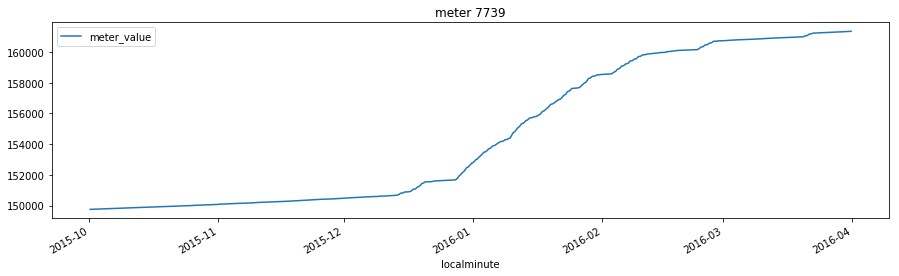

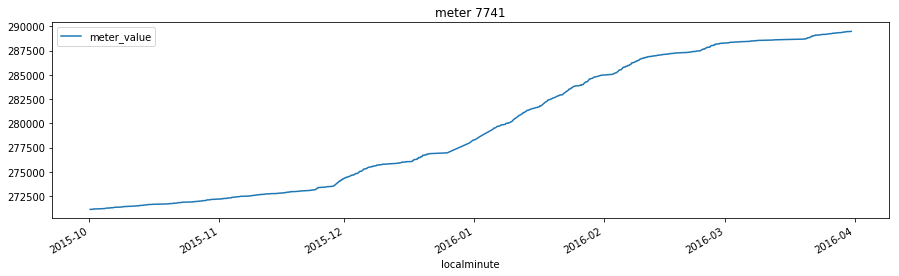

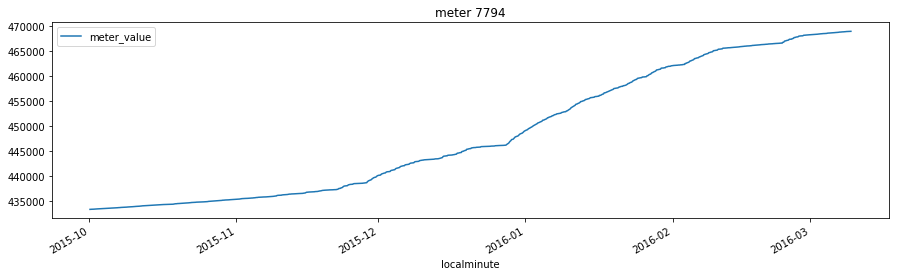

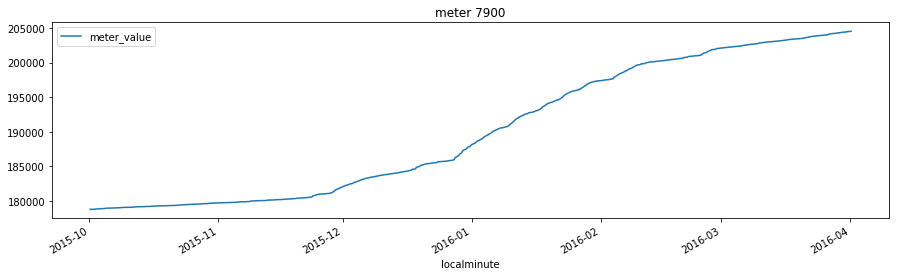

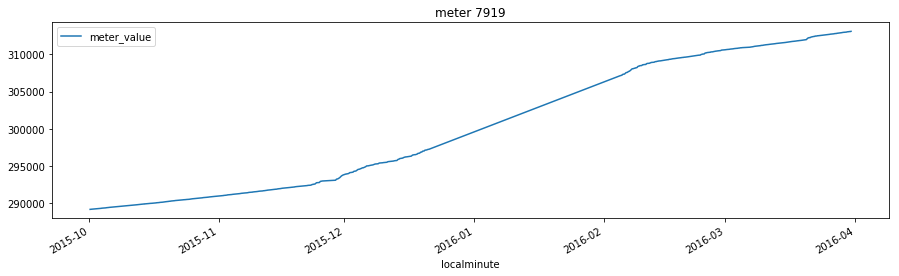

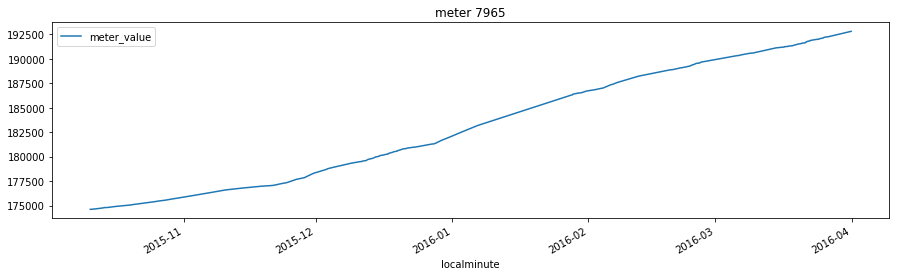

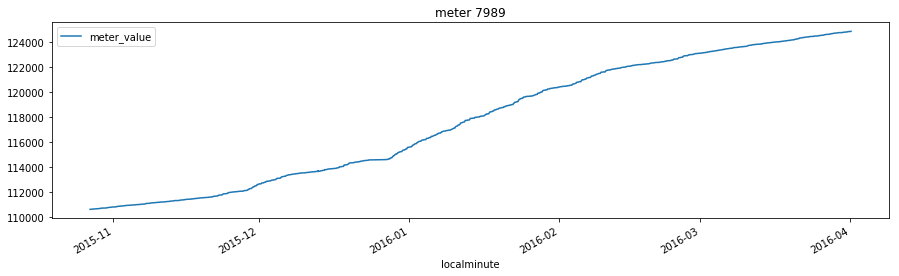

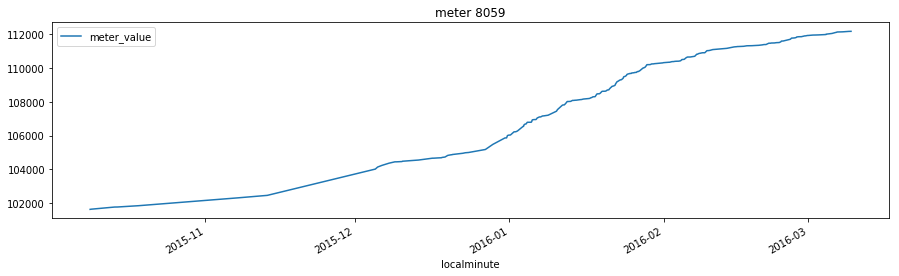

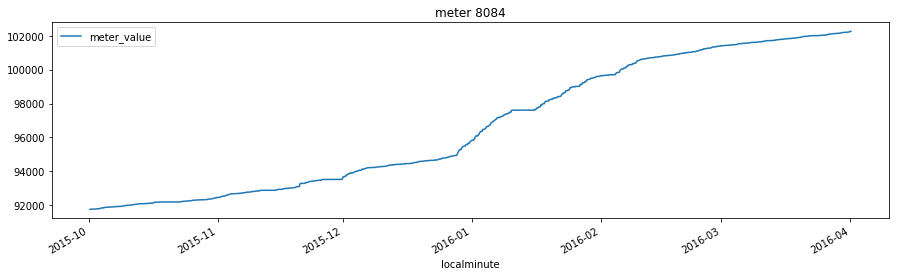

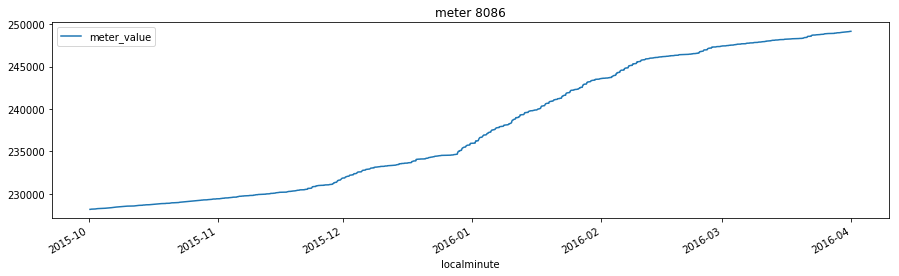

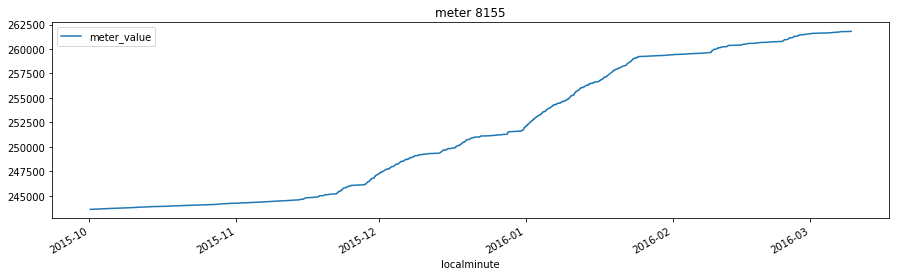

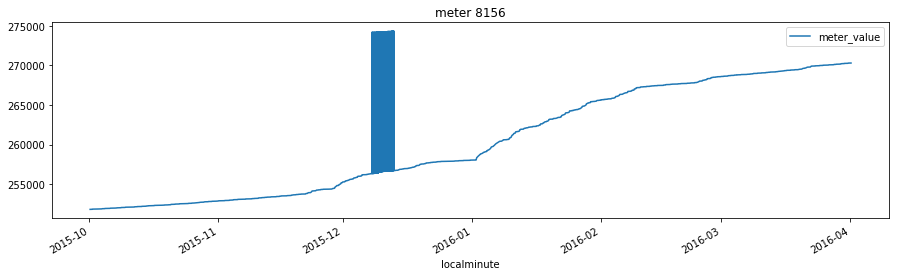

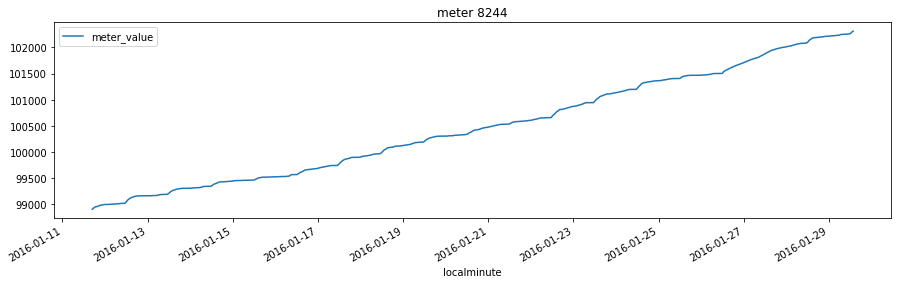

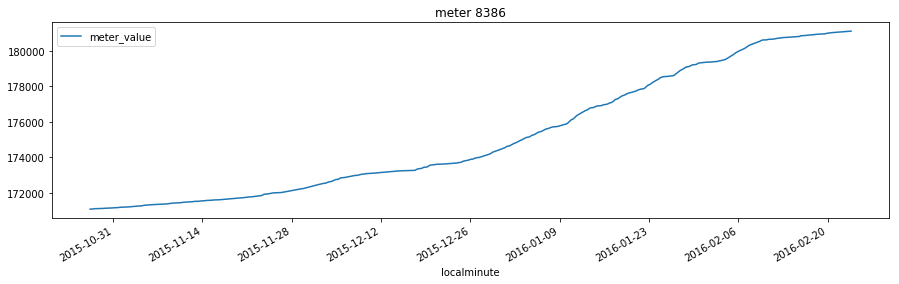

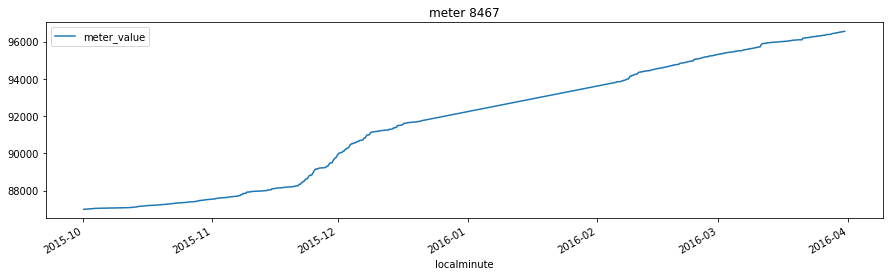

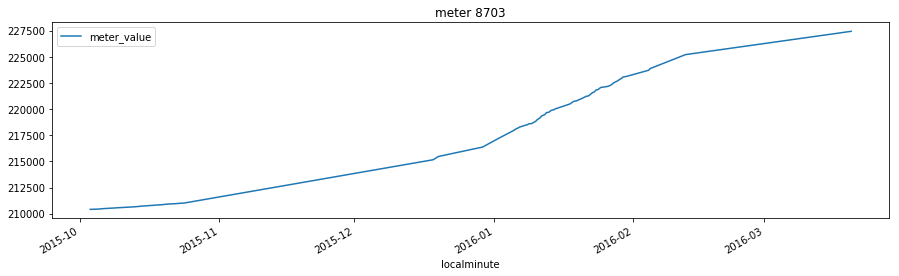

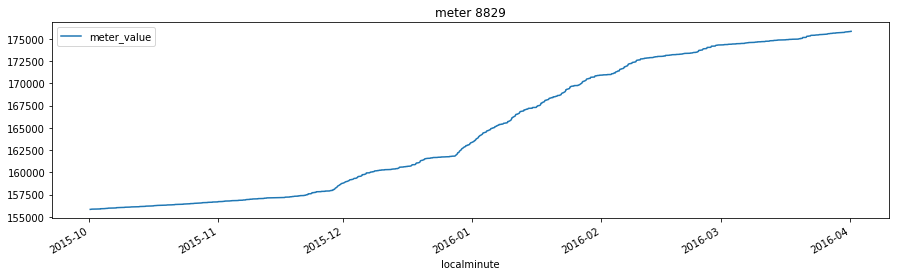

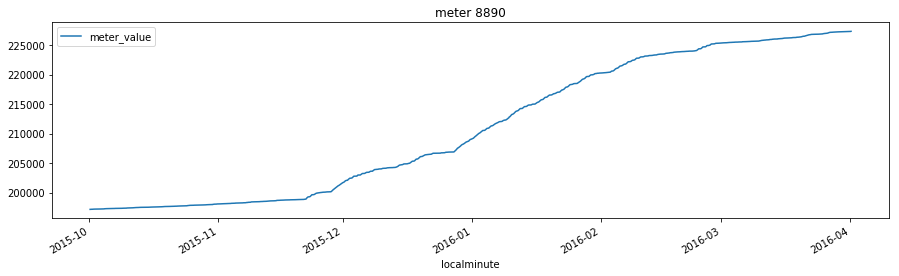

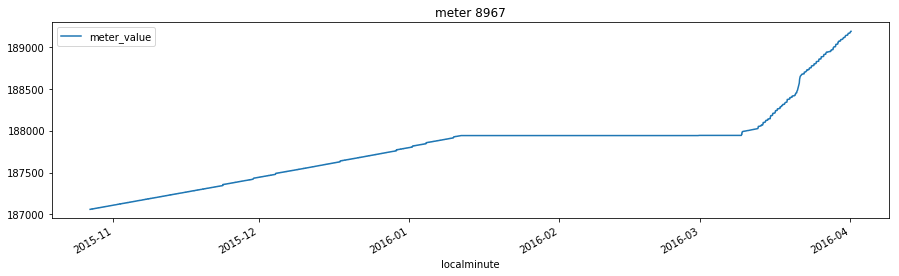

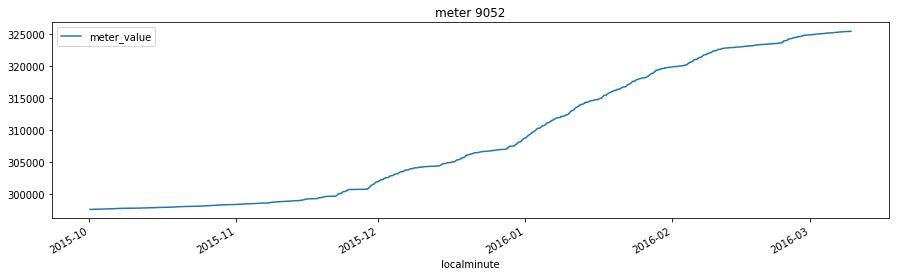

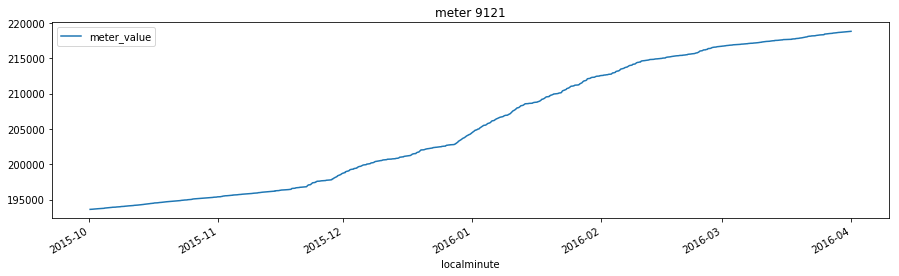

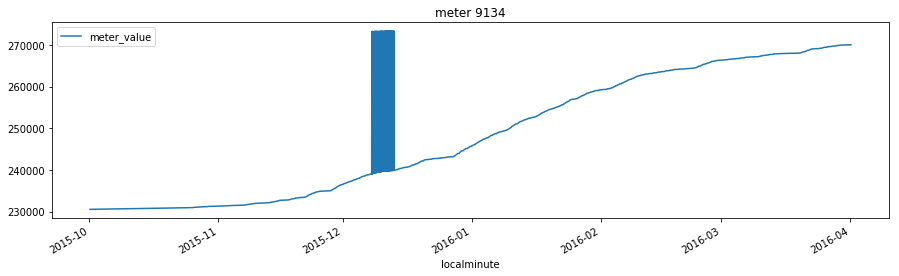

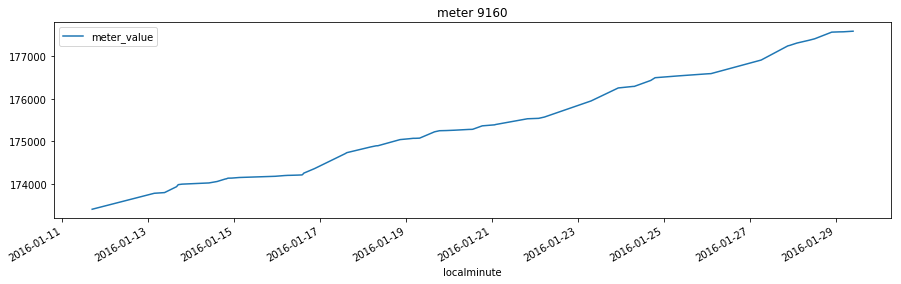

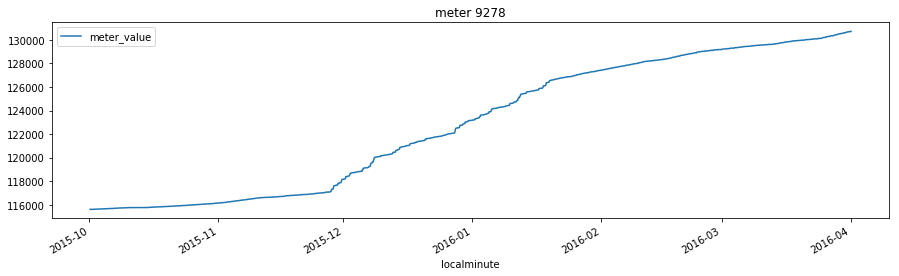

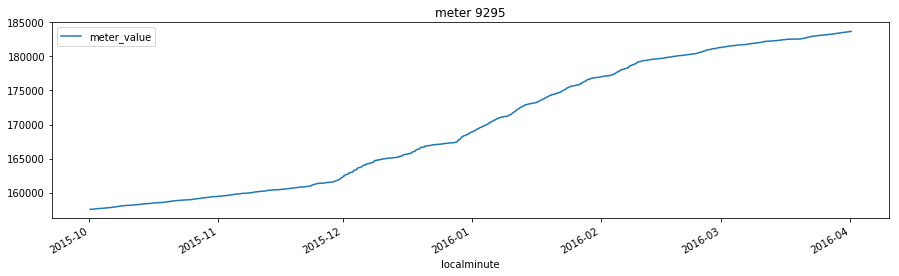

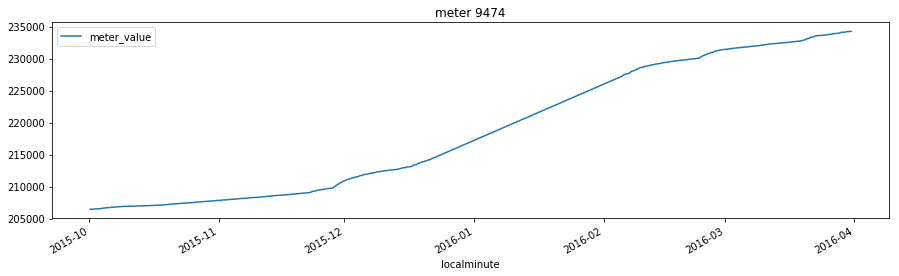

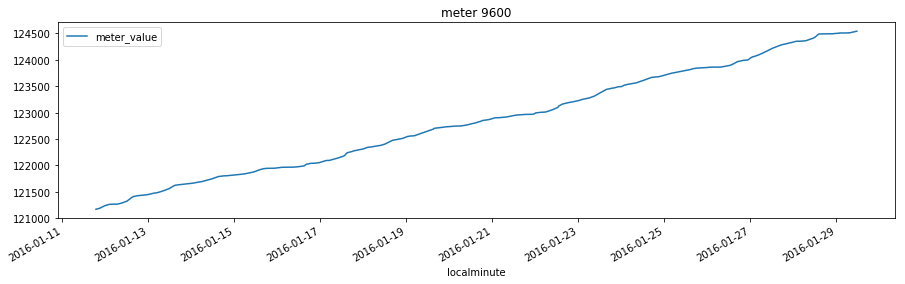

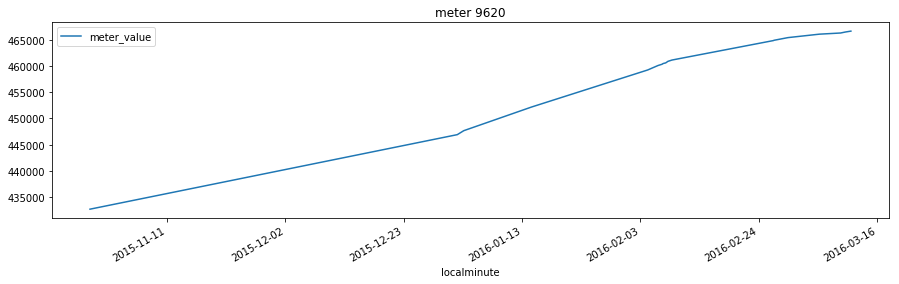

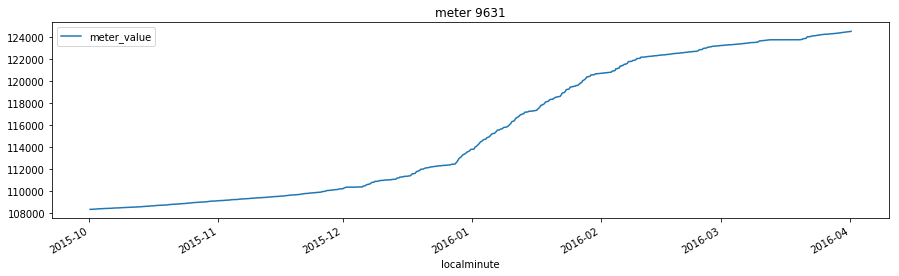

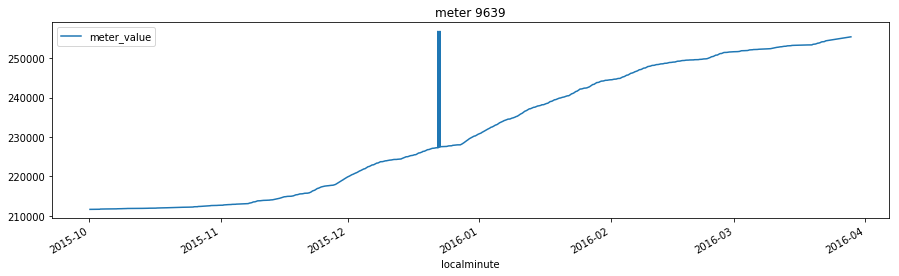

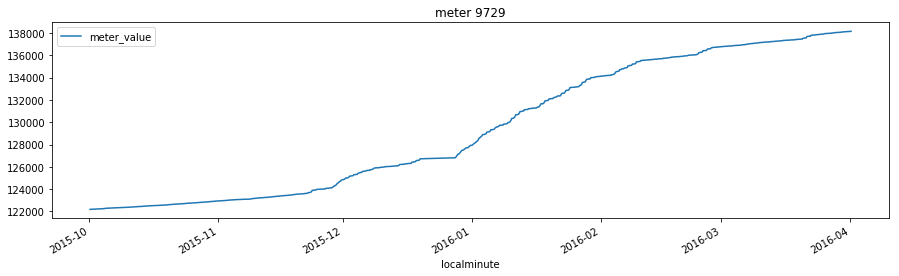

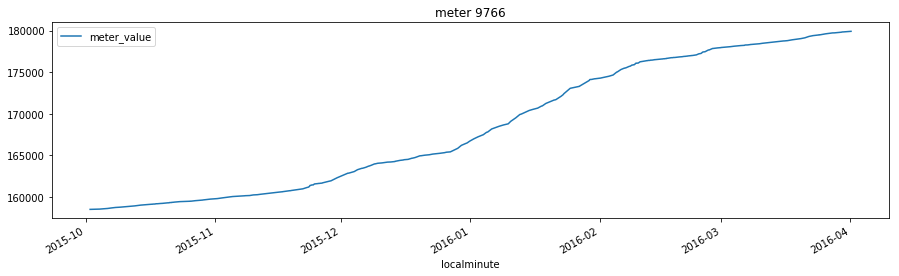

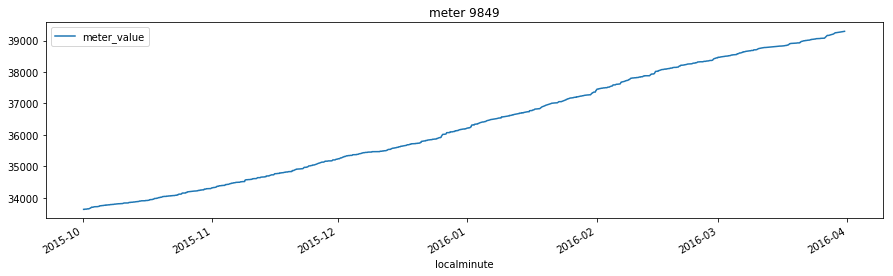

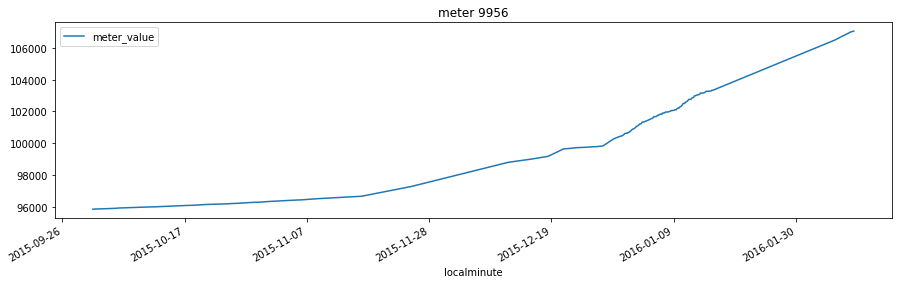

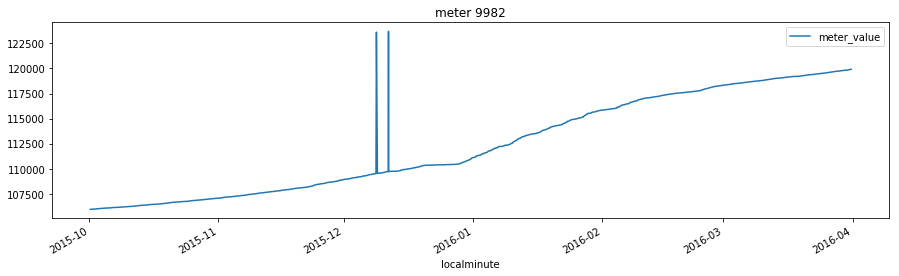

In [35]:
for key in keys_list:    
    df_i = groups.get_group(key)
    df_i.drop(columns='dataid').plot(figsize=(15,4), title=str(f'meter {key}'))

In [45]:
key = 8156
df_i = groups.get_group(key)

### Select data by datetime period.

In [46]:
start_date = pd.to_datetime('2015-10-1')
end_date = pd.to_datetime('2015-10-31')
mask = (df_i.index > start_date) & (df_i.index <= end_date)

df_i_bymonth = df_i.iloc[mask]
display(df_i_bymonth.head())
len(df_i_bymonth)

,dataid,meter_value
localminute,,
2015-10-01 05:02:37,8156,251818
2015-10-01 05:07:38,8156,251818
2015-10-01 05:44:37,8156,251818
2015-10-01 05:48:37,8156,251818
2015-10-01 06:09:37,8156,251818


4475

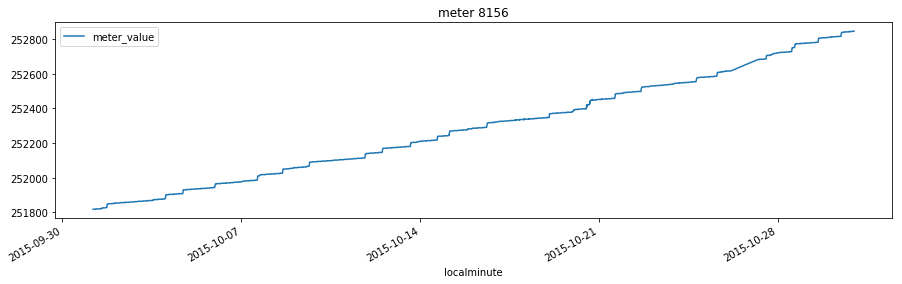

In [47]:
df_i_bymonth.drop(columns='dataid').plot(figsize=(15,4), title=str(f'meter {key}'))

### Resample with hourly frequency.

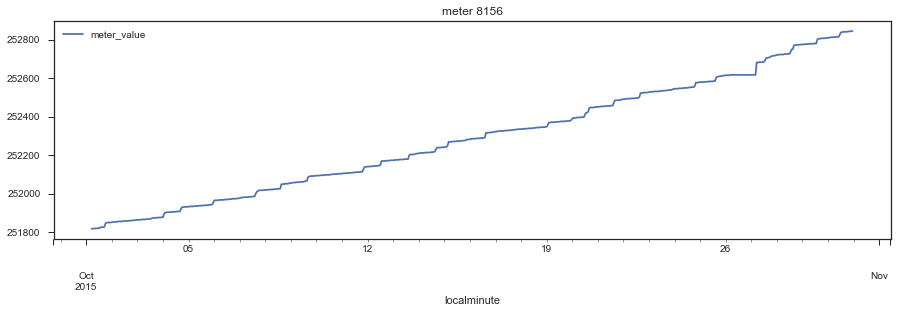

In [60]:
df_i_bymonth_2 = df_i_bymonth.drop(columns='dataid')
df_i_bymonth_2_resampled = df_i_bymonth_2.resample('H').mean().ffill()
df_i_bymonth_2_resampled.plot(figsize=(15,4), title=str(f'meter {key}'))

In [52]:
display(len(df_i_bymonth_2_resampled))

715

In [53]:
# todo: clean dirty data from faulty meters by extrapolating the clean data.